# <font color='#ff5748'>***Group 23 Term Project***</font>
---



### <font color='#18A558'>***Libraries***</font>
---



In [42]:
!pip install -U tfa-nightly

Requirement already up-to-date: tfa-nightly in /anaconda/envs/azureml_py38/lib/python3.8/site-packages (0.17.0.dev20220808081458)


In [56]:
import pandas as pd, numpy as np,re
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy import stats
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from tensorflow.keras.layers import LeakyReLU

### <font color='#18A558'>***Functions***</font>
---



In [58]:
def readDataSet(DataSet_name, Sheet_Name):
    Extension = re.findall('((.csv)|(.xls)|(.xlsx))', DataSet_name)
    Extension = str(Extension)
    if '.csv' in Extension:
        Extension = '.csv'
    elif '.xls' in Extension:
        Extension = '.xls'
    elif '.xlsx' in Extension:
        Extension = '.xlsx'
    if Extension == ('.xls' or '.xlsx'):
        DataFrame = pd.read_excel(DataSet_name, sheet_name = Sheet_Name)
    elif Extension == '.csv':
        DataFrame = pd.read_csv(DataSet_name)
    return DataFrame

def ConfusionMatrix(Y_Actual, Y_Pred):
    CF = confusion_matrix(Y_Actual, Y_Pred)
    return CF

def PLOT_ConfusionMatrix(CF,Title):
    sns.heatmap(CF, annot=True, fmt='d')
    plt.title(Title, fontsize = 15)
    plt.xlabel('Predicted', fontsize = 15)
    plt.ylabel('Actual', fontsize = 15)
    return plt.show()

def T_SNE(X):
  return TSNE(n_components=2, random_state = 0).fit_transform(X)

def AccuracyTest(Y_Actual, Y_Pred):
  return accuracy_score(Y_Actual, Y_Pred) * 100

def most_frq_num(List):
  counter = 0
  num = List[0]
  for i in List:
      curr_frequency = List.count(i)
      if(curr_frequency> counter):
          counter = curr_frequency
          num = i
  return num

def GetListOfClasses(numberOfClasses, DataSet, TargetColumn):
        ls = [None] * numberOfClasses
        for i in range(0,numberOfClasses):
            ls[i] = DataSet.loc[DataSet[TargetColumn] == i]
        return ls

def PlotDataPoints(numberOfClasses, ListOFClasses, XLabel, Ylabel ,labels ,S, Title):
    colorsOptions = ['#FF0000','#8941FF','blue','#00FF0F','#FF00AE','#000000','#0B9397','#1B49CD','#11AF29','#560078','#ED036A']
    MarkersOptions = ['h','*','v','^','D','x','X','P','H','d']
    colors = colorsOptions[0:numberOfClasses]
    Markers = MarkersOptions[0:numberOfClasses]
    
    for i in range(numberOfClasses):
        plt.scatter(x = ListOFClasses[i].iloc[:, 0:1], y = ListOFClasses[i].iloc[:, 1:2], c=colors[i], marker = Markers[i], s=S, label = labels[i])

    plt.xlabel(XLabel, fontsize = 15)
    plt.ylabel(Ylabel, fontsize = 15)
    plt.title(Title)
    plt.legend()
    return plt

def Plot(X,Y,Label,Color, Marker , S , Xlabel , Ylabel , Title):
  plt.plot(X, Y, label = Label, c = Color)
  plt.scatter(X,Y, c=Color, marker = Marker , s=S)
  plt.xlabel(Xlabel)
  plt.ylabel(Ylabel)
  plt.title(Title)
  plt.legend()
  # plt.show()
  return plt

### <font color='#18A558'>***Main***</font>
---



In [ ]:
# Upload DataSet to colab
Train = files.upload()
Test = files.upload()
Validation = files.upload()

In [59]:
# Read DataSet
Train = readDataSet('train.csv', 'train')
Train

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,1,0,0,0,0,0,4,819,757,TCP-SYN
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,2,0,0,0,0,0,5,1018,918,TCP-SYN
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,2,0,0,0,0,0,8,987400,987276,Normal
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,3,0,0,0,0,0,8,195879,195780,PortScan
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,1,0,0,0,0,0,4,4524,4411,Overflow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,of:0000000000000008,Port#:1,646,18927937,26139,253,151,2,278,278,...,4,0,0,0,0,0,6,1563,1469,PortScan
2615,of:000000000000000b,Port#:2,3149,25488846,31784484,3205,2326,4,556,556,...,3,0,0,0,0,0,4,14774,14647,Blackhole
2616,of:000000000000000c,Port#:3,386,6324623,13285,97,101,27,526635,556,...,2,0,0,0,0,0,8,2688,2590,TCP-SYN
2617,of:000000000000000c,Port#:2,807,12638724,25268608,1238,366,47,3379,3939658,...,2,630355,6303550,630355,6303550,630355,6,3088,2976,Blackhole


In [60]:
# Read DataSet
Test = readDataSet('test.csv', 'test')
Test

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:2,117,15705,15537,113,126,2,278,348,...,3,0,0,0,0,0,6,2350,2265,TCP-SYN
1,of:000000000000000a,Port#:4,349224,14743367,38139845,156153,1430,4,556,560,...,4,0,0,0,0,0,4,649491,649367,Normal
2,of:000000000000000a,Port#:2,127,8855,6316408,271,96,0,0,280,...,2,0,0,0,0,0,6,3933,3848,TCP-SYN
3,of:0000000000000005,Port#:3,1396,25241475,31751210,2853,2172,178,4992757,7565,...,1,0,0,0,0,0,8,10237,10113,Blackhole
4,of:000000000000000a,Port#:1,12,1016,13549,101,101,0,0,556,...,2,0,0,0,0,0,10,6269,6181,TCP-SYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,of:000000000000000c,Port#:1,2314,31679329,6456143,1448,1431,2,278,280,...,5,0,0,0,0,0,8,9372,9162,Diversion
557,of:0000000000000008,Port#:2,5923,101167794,19135198,2378,2116,4,556,556,...,2,0,0,0,0,0,8,17193,17055,Blackhole
558,of:0000000000000001,Port#:1,472,12623572,24419,235,136,2,278,278,...,2,0,0,0,0,0,5,1706,1596,TCP-SYN
559,of:0000000000000005,Port#:3,253,26245,18904,147,156,6,640,640,...,2,0,0,0,0,0,6,5780,5668,TCP-SYN


In [61]:
# Read DataSet
Val = readDataSet('val.csv', 'val')
Val

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:000000000000000a,Port#:1,2594,75671796,31757809,3308,1672,0,0,560,...,2,0,0,0,0,0,6,12271,12057,Diversion
1,of:0000000000000002,Port#:1,10,856,9732,74,61,0,0,348,...,2,0,0,0,0,0,8,778,697,TCP-SYN
2,of:000000000000000a,Port#:3,2192,12805806,31695352,2412,1566,57,1839337,2615,...,2,0,0,0,0,0,6,6233,6156,Blackhole
3,of:0000000000000002,Port#:1,401,6327186,24401,240,131,85,6316,759,...,4,0,0,0,0,0,6,1228,1134,PortScan
4,of:0000000000000002,Port#:1,3799,82050574,88575612,5526,2547,0,0,556,...,1,0,0,0,0,0,4,10977,10896,Blackhole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,of:0000000000000005,Port#:3,133,9251,6317978,286,106,0,0,560,...,1,0,0,0,0,0,8,1718,1631,TCP-SYN
557,of:000000000000000a,Port#:4,1216,31540813,36309076,413180,1037,80,5557,6171245,...,2,0,0,0,0,0,6,983638,983516,Normal
558,of:000000000000000b,Port#:2,1736,19039951,6408719,1005,1071,3,348,280,...,5,0,0,0,0,0,4,6950,6779,Diversion
559,of:000000000000000b,Port#:2,187954,52149755,55635486,121662,2560,2,280,280,...,2,0,0,0,0,0,5,519051,518963,Normal


# <font color='#18A558'>**Exploratory Data Analysis**</font>
---



### <font color='#18A558'>**Data Distribution**</font>
---



100%|██████████| 5/5 [00:00<00:00,  9.72it/s]


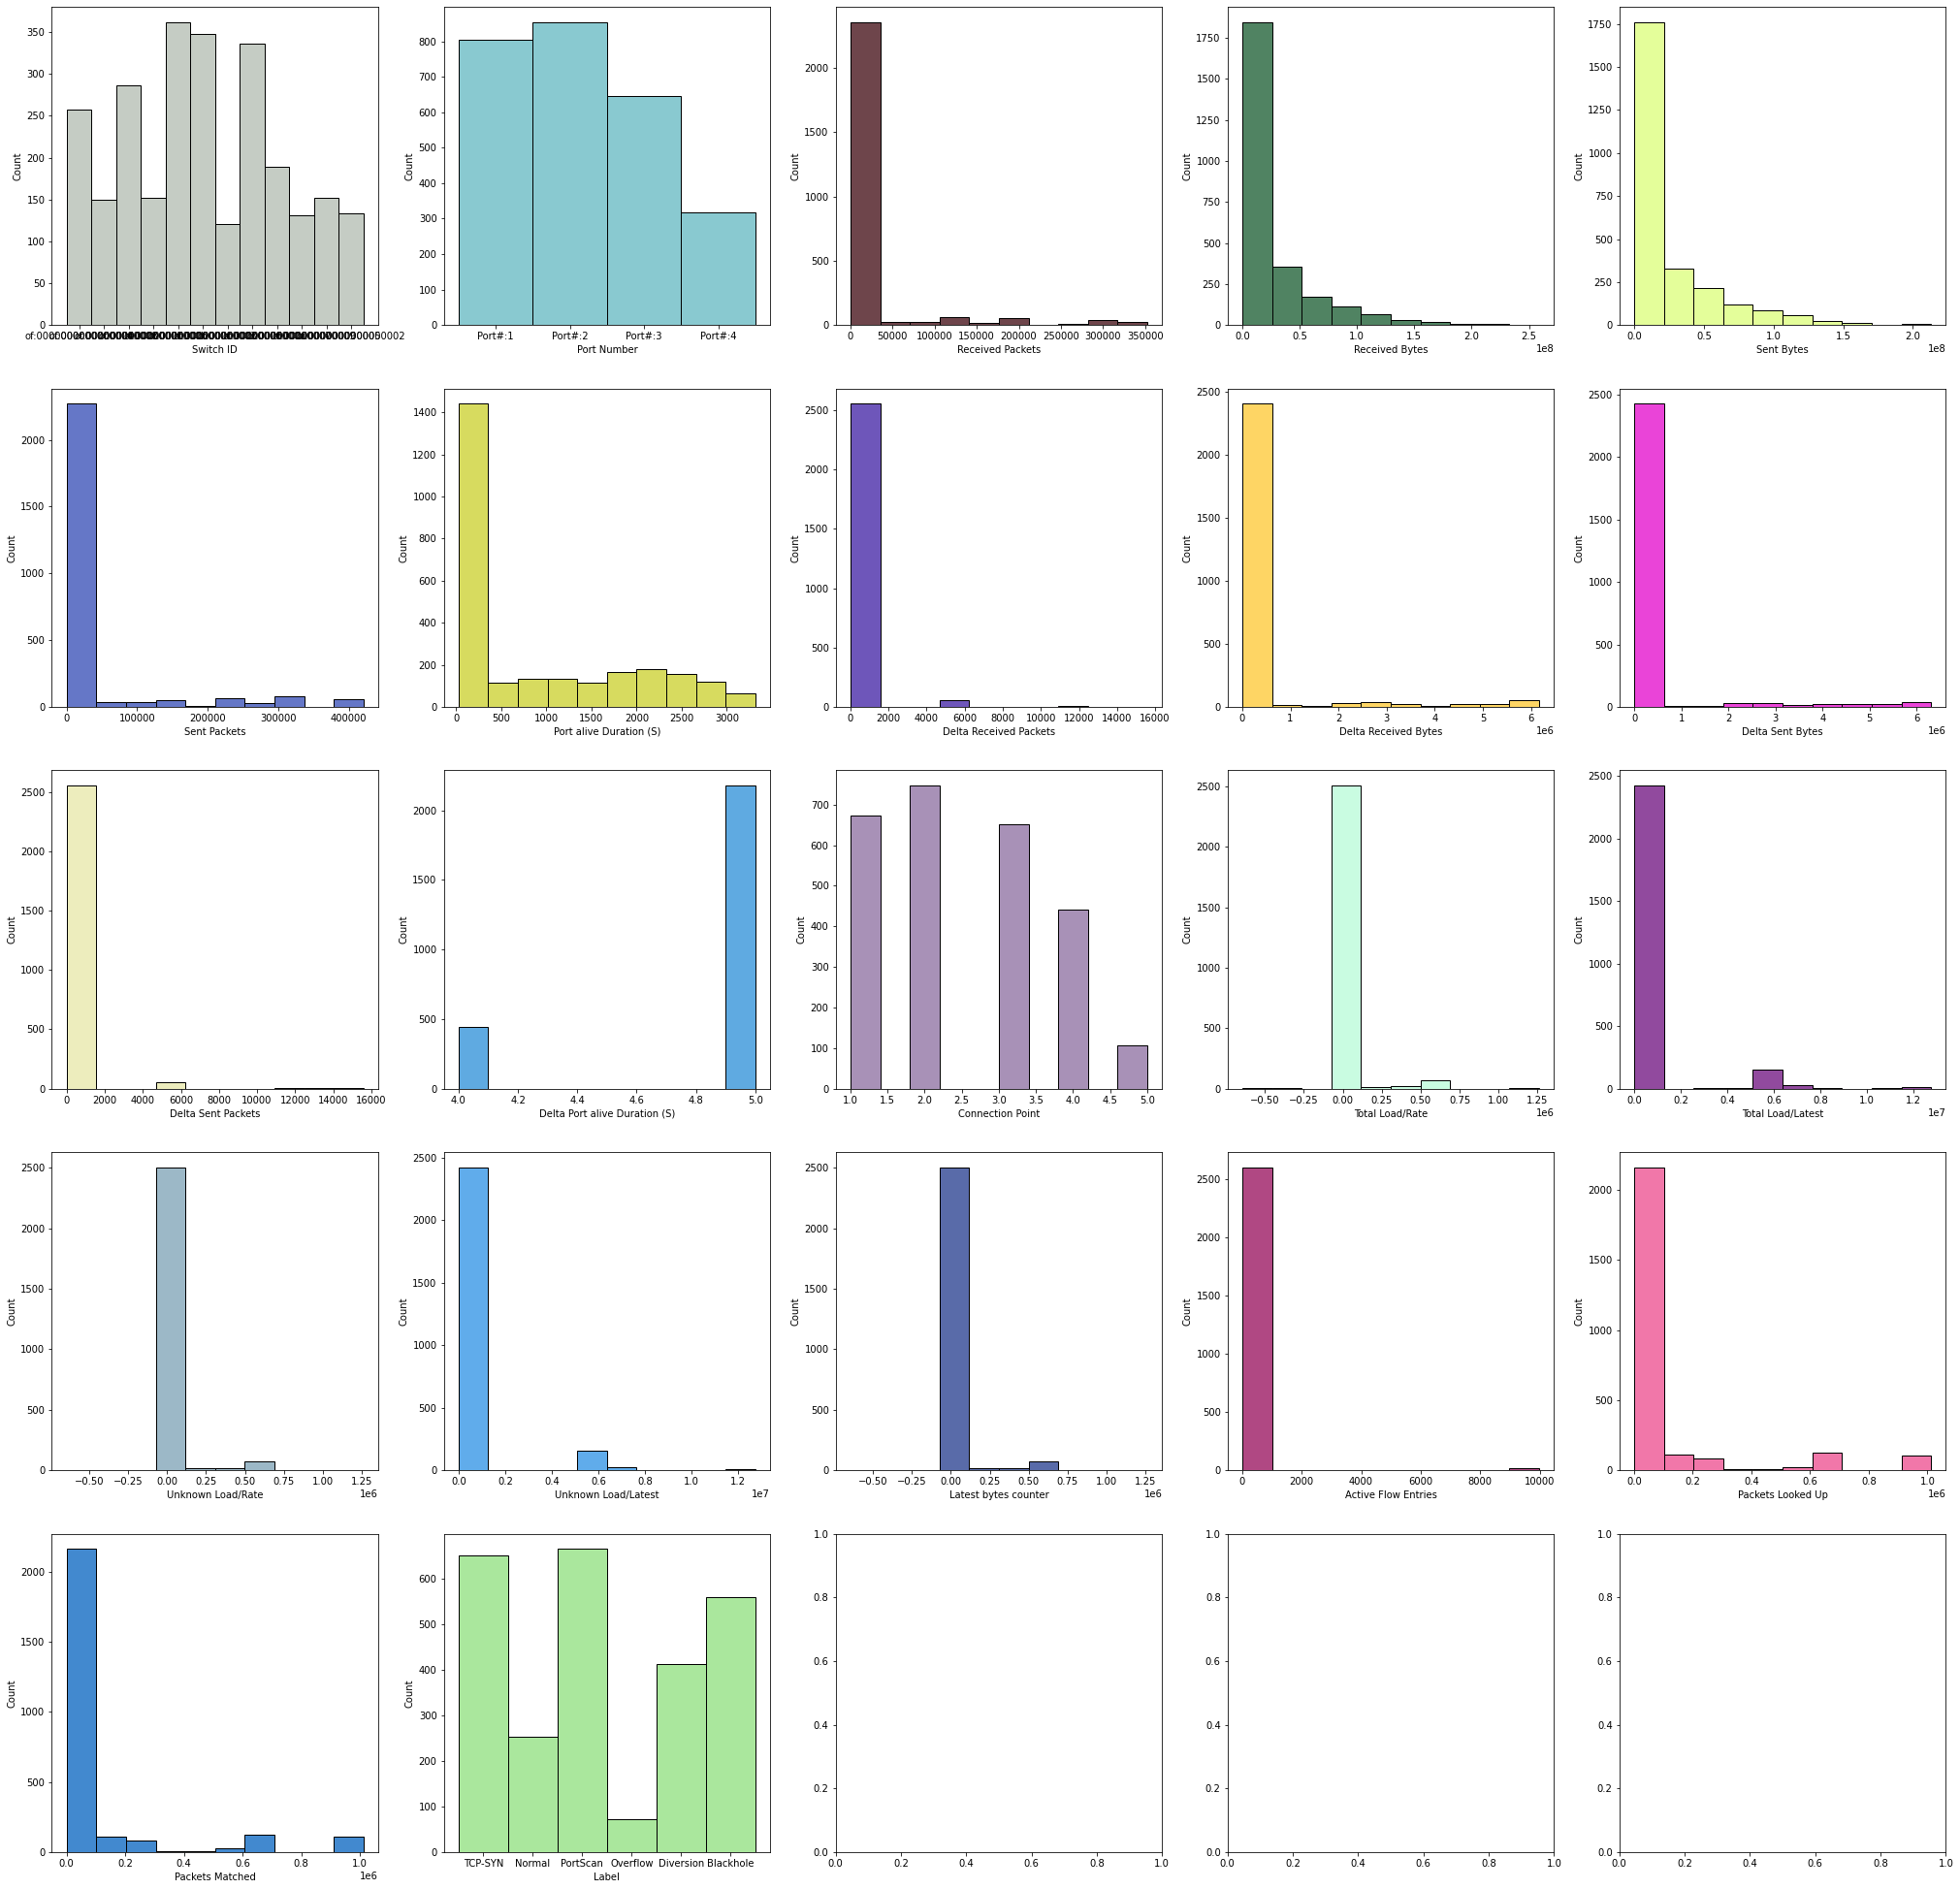

In [62]:
# Data Distribution
number_of_colors = 22
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
count = 0
Figure, Axis = plt.subplots(5,5,figsize=(35,35))

for i in tqdm(range(5)):
  for j in tqdm(range(5)):
      sns.histplot(ax = Axis[i,j],x = Train.iloc[:,count], color = colors[count], bins=10)
      count = count + 1
      if count>21:
        break
Figure.show()

### <font color='#18A558'>**Missing Values**</font>
---



In [14]:
# Check if there a missing values
Train.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

### <font color='#18A558'>**Instances per class**</font>
---



In [63]:
# Number of instances per class
Train.iloc[:,[21]].value_counts()

Label    
PortScan     666
TCP-SYN      651
Blackhole    561
Diversion    414
Normal       254
Overflow      73
dtype: int64

### <font color='#18A558'>**Check if the Data is Balanced or not**</font>
---



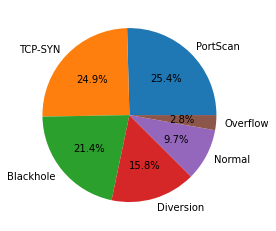

In [64]:
# Check if the data is balanced or unbalanced
Labels = ["PortScan", "TCP-SYN", "Blackhole", "Diversion", 'Normal' , 'Overflow']
plt.pie(list(Train.iloc[:,[21]].value_counts()), labels = Labels, autopct='%1.1f%%')
plt.show()

In [65]:
# Number of instances per class
Test.iloc[:,[21]].value_counts()

Label    
TCP-SYN      156
PortScan     127
Blackhole    122
Diversion     90
Normal        49
Overflow      17
dtype: int64

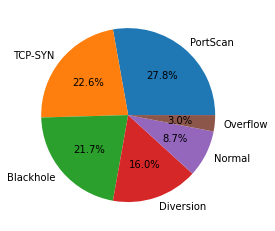

In [66]:
# Check if the data is balanced or unbalanced
Labels = ["PortScan", "TCP-SYN", "Blackhole", "Diversion", 'Normal' , 'Overflow']
plt.pie(list(Test.iloc[:,[21]].value_counts()), labels = Labels, autopct='%1.1f%%')
plt.show()

In [67]:
# Number of instances per class
Val.iloc[:,[21]].value_counts()

Label    
Blackhole    143
PortScan     141
TCP-SYN      123
Diversion     92
Normal        47
Overflow      15
dtype: int64

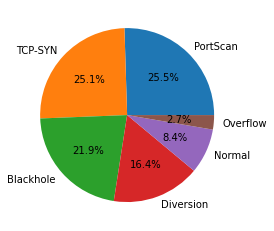

In [68]:
# Check if the data is balanced or unbalanced
Labels = ["PortScan", "TCP-SYN", "Blackhole", "Diversion", 'Normal' , 'Overflow']
plt.pie(list(Val.iloc[:,[21]].value_counts()), labels = Labels, autopct='%1.1f%%')
plt.show()

### <font color='#18A558'>**Outliers**</font>
---



In [70]:
# Detecting the number of outliers in each column (Z-Scores)
ABS_Z_scores = np.abs(stats.zscore(Numeric_Features))
Numeric_Features.columns
ABS_Z_scores = pd.DataFrame(ABS_Z_scores)
temp = ABS_Z_scores.copy()
ABS_Z_scores = ABS_Z_scores[ABS_Z_scores>=3]
ll = list(Numeric_Features.columns)
for i in range(0,19):
  print(ll[i])
  print(ABS_Z_scores.iloc[:,[i]].value_counts().sum())

NoOutliers = (temp < 3).all(axis=1)
print("Total number of outliers in Train = ", len(Train) - len(Train[NoOutliers]))

Received Packets
80
Received Bytes
58
Sent Bytes
55
Sent Packets
103
Port alive Duration (S)
0
Delta Received Packets
64
Delta Received Bytes
108
Delta Sent Bytes
105
Delta Sent Packets
59
Delta Port alive Duration (S)
0
Connection Point
0
Total Load/Rate
90
Total Load/Latest
185
Unknown Load/Rate
90
Unknown Load/Latest
185
Latest bytes counter
90
Active Flow Entries
18
Packets Looked Up
106
Packets Matched
106
Total number of outliers in Train =  657


100%|██████████| 4/4 [00:00<00:00, 172.33it/s]

100%|██████████| 4/4 [00:00<00:00, 184.48it/s]

100%|██████████| 4/4 [00:00<00:00, 183.41it/s]

100%|██████████| 4/4 [00:00<00:00, 187.19it/s]

100%|██████████| 5/5 [00:00<00:00, 42.12it/s]


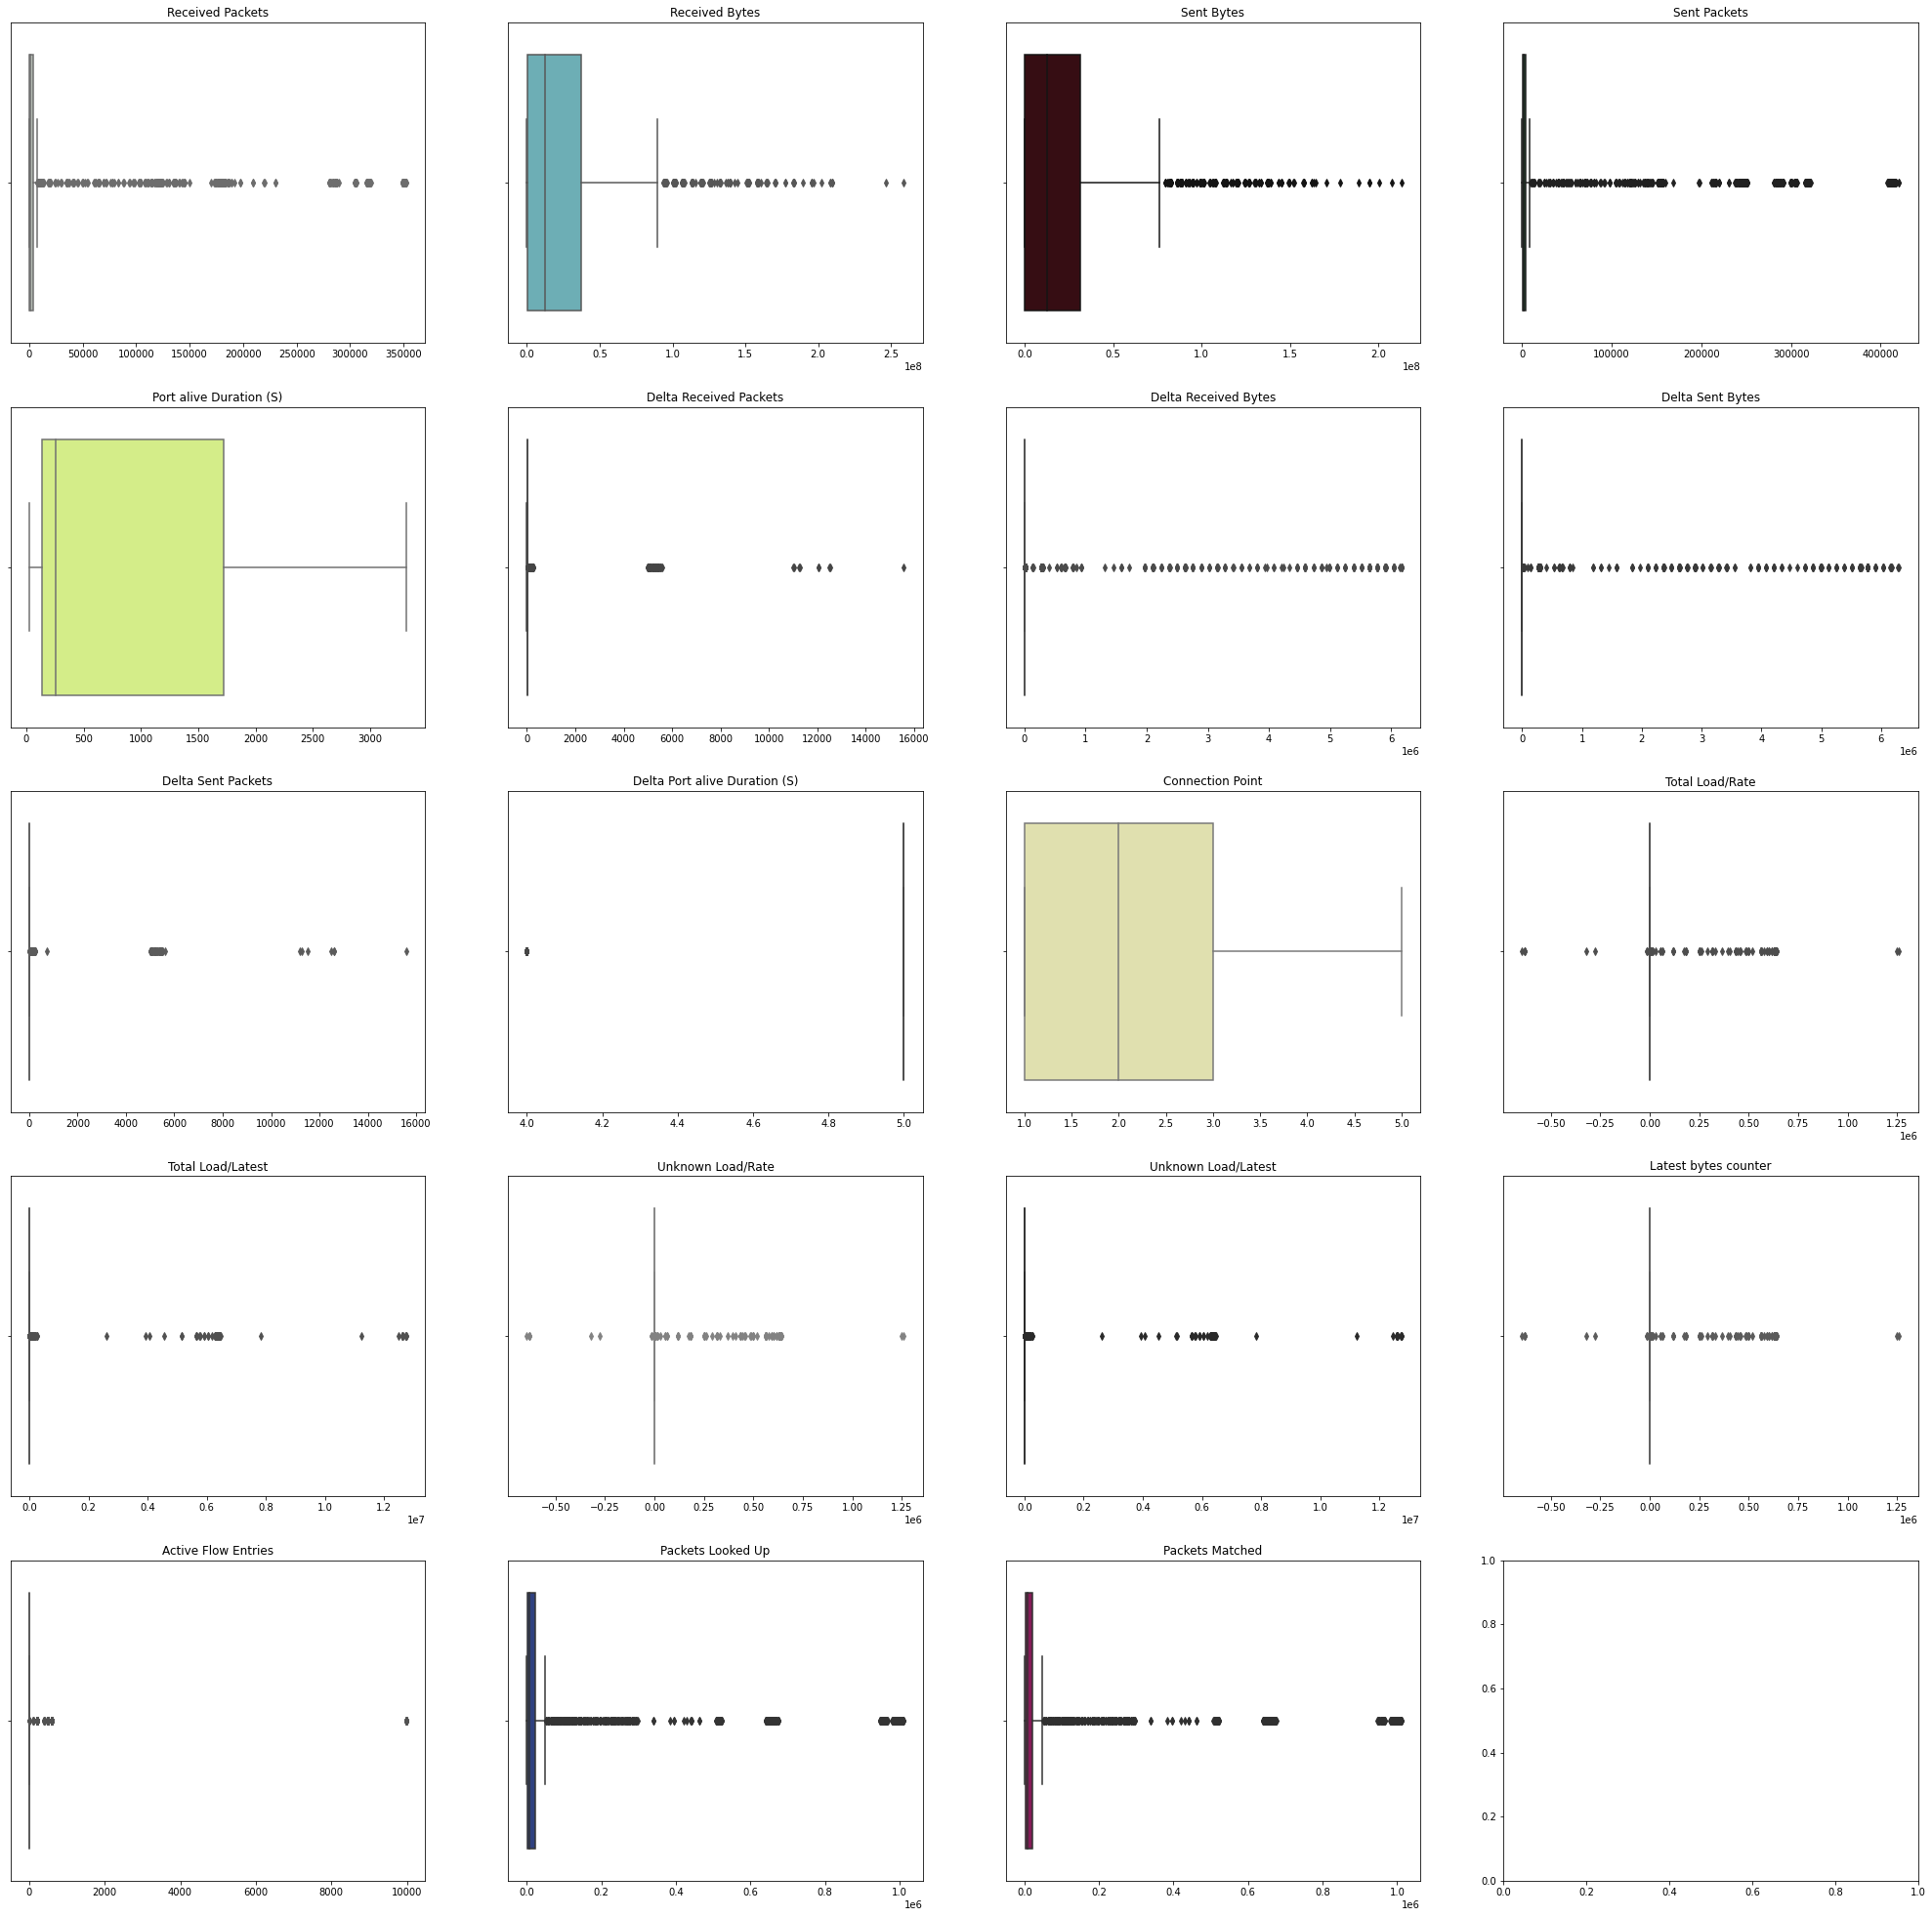

In [69]:
# Detecting outliers (Box Plot)
count = 0
Figure, Axis = plt.subplots(5,4,figsize=(35,35))
Numeric_Features = Train.iloc[:,2:21]
names = list(Numeric_Features.columns)
for i in tqdm(range(5)):
  for j in tqdm(range(4)):
      sns.boxplot(ax = Axis[i,j],x = Numeric_Features.iloc[:,count].to_numpy(), color = colors[count]).set(title=names[count])
      count = count + 1
      if count>18:
        break
Figure.show()

<font color='#18A558'>**Statistical analysis**</font>
---



In [71]:
Numeric_Features.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2619.000000,2.619000e+03,2.619000e+03
mean,19929.095074,2.606639e+07,2.372645e+07,33676.567774,890.539137,174.948835,3.254661e+05,2.957171e+05,160.607866,4.831615,2.450935,2.044276e+04,5.033087e+05,2.044276e+04,5.033087e+05,2.044276e+04,94.972890,9.920463e+04,9.908445e+04
std,61817.860816,3.670801e+07,3.309908e+07,90565.150583,970.916789,1028.907797,1.166624e+06,1.107859e+06,972.484039,0.374279,1.159286,1.141013e+05,1.796231e+06,1.141013e+05,1.796231e+06,1.141013e+05,828.181086,2.363175e+05,2.363162e+05
min,10.000000,8.560000e+02,6.025000e+03,44.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.000000,-6.446240e+05,0.000000e+00,-6.446240e+05,0.000000e+00,-6.446240e+05,4.000000,1.050000e+02,5.000000e+01
25%,321.500000,8.464900e+04,5.360900e+04,333.500000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.263000e+03,2.147000e+03
50%,1108.000000,1.262083e+07,1.262176e+07,1243.000000,254.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,6.968000e+03,6.843000e+03
75%,3268.500000,3.736785e+07,3.170219e+07,3727.000000,1721.000000,6.000000,8.310000e+02,7.590000e+02,5.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,2.163300e+04,2.140800e+04
max,352584.000000,2.589422e+08,2.130728e+08,420806.000000,3317.000000,15588.000000,6.171714e+06,6.302910e+06,15593.000000,5.000000,5.000000,1.260657e+06,1.275386e+07,1.260657e+06,1.275386e+07,1.260657e+06,9985.000000,1.012220e+06,1.012085e+06


### <font color='#18A558'>**Label Encoder for the Categorival columns**</font>
---



In [72]:
labelObj = preprocessing.LabelEncoder()
Train['Switch ID'] = labelObj.fit_transform(Train['Switch ID'])
Test['Switch ID'] = labelObj.transform(Test['Switch ID'])
Val['Switch ID'] = labelObj.transform(Val['Switch ID'])

Train['Port Number'] = labelObj.fit_transform(Train['Port Number'])
Test['Port Number'] = labelObj.transform(Test['Port Number'])
Val['Port Number'] = labelObj.transform(Val['Port Number'])

Train['Label'] = labelObj.fit_transform(Train['Label'])
Test['Label'] = labelObj.transform(Test['Label'])
Val['Label'] = labelObj.transform(Val['Label'])

Train

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,3,0,240,16586,12622603,467,126,0,0,280,...,1,0,0,0,0,0,4,819,757,5
1,3,1,158,20530,35464,376,171,4,556,3407,...,2,0,0,0,0,0,5,1018,918,5
2,7,2,1930,37881404,67857371,414333,1297,0,0,556,...,2,0,0,0,0,0,8,987400,987276,2
3,0,3,903,18946410,17900326,98088,176,3,320,270280,...,3,0,0,0,0,0,8,195879,195780,4
4,10,0,423,29020,19138042,1562,1451,0,0,560,...,1,0,0,0,0,0,4,4524,4411,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,7,0,646,18927937,26139,253,151,2,278,278,...,4,0,0,0,0,0,6,1563,1469,4
2615,10,1,3149,25488846,31784484,3205,2326,4,556,556,...,3,0,0,0,0,0,4,14774,14647,0
2616,11,2,386,6324623,13285,97,101,27,526635,556,...,2,0,0,0,0,0,8,2688,2590,5
2617,11,1,807,12638724,25268608,1238,366,47,3379,3939658,...,2,630355,6303550,630355,6303550,630355,6,3088,2976,0


In [73]:
Test

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,3,1,117,15705,15537,113,126,2,278,348,...,3,0,0,0,0,0,6,2350,2265,5
1,9,3,349224,14743367,38139845,156153,1430,4,556,560,...,4,0,0,0,0,0,4,649491,649367,2
2,9,1,127,8855,6316408,271,96,0,0,280,...,2,0,0,0,0,0,6,3933,3848,5
3,4,2,1396,25241475,31751210,2853,2172,178,4992757,7565,...,1,0,0,0,0,0,8,10237,10113,0
4,9,0,12,1016,13549,101,101,0,0,556,...,2,0,0,0,0,0,10,6269,6181,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,11,0,2314,31679329,6456143,1448,1431,2,278,280,...,5,0,0,0,0,0,8,9372,9162,1
557,7,1,5923,101167794,19135198,2378,2116,4,556,556,...,2,0,0,0,0,0,8,17193,17055,0
558,0,0,472,12623572,24419,235,136,2,278,278,...,2,0,0,0,0,0,5,1706,1596,5
559,4,2,253,26245,18904,147,156,6,640,640,...,2,0,0,0,0,0,6,5780,5668,5


In [74]:
Val

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,9,0,2594,75671796,31757809,3308,1672,0,0,560,...,2,0,0,0,0,0,6,12271,12057,1
1,1,0,10,856,9732,74,61,0,0,348,...,2,0,0,0,0,0,8,778,697,5
2,9,2,2192,12805806,31695352,2412,1566,57,1839337,2615,...,2,0,0,0,0,0,6,6233,6156,0
3,1,0,401,6327186,24401,240,131,85,6316,759,...,4,0,0,0,0,0,6,1228,1134,4
4,1,0,3799,82050574,88575612,5526,2547,0,0,556,...,1,0,0,0,0,0,4,10977,10896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,4,2,133,9251,6317978,286,106,0,0,560,...,1,0,0,0,0,0,8,1718,1631,5
557,9,3,1216,31540813,36309076,413180,1037,80,5557,6171245,...,2,0,0,0,0,0,6,983638,983516,2
558,10,1,1736,19039951,6408719,1005,1071,3,348,280,...,5,0,0,0,0,0,4,6950,6779,1
559,10,1,187954,52149755,55635486,121662,2560,2,280,280,...,2,0,0,0,0,0,5,519051,518963,2


### <font color='#18A558'>**Feature Scaling**</font>
---



In [75]:
scaler = StandardScaler()
Train.iloc[:,0:21] = scaler.fit_transform(Train.iloc[:,0:21])
Test.iloc[:,0:21] = scaler.transform(Test.iloc[:,0:21])
Val.iloc[:,0:21] = scaler.transform(Val.iloc[:,0:21])

In [76]:
Train

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,-0.682386,-1.179390,-0.318563,-0.709785,-0.335537,-0.366763,-0.787591,-0.170066,-0.279034,-0.266725,...,-1.251816,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.109868,-0.416408,-0.416164,5
1,-0.682386,-0.181386,-0.319889,-0.709677,-0.715896,-0.367768,-0.741234,-0.166178,-0.278558,-0.263902,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.108660,-0.415565,-0.415482,5
2,0.382197,0.816618,-0.291219,0.321926,1.333552,4.203925,0.418716,-0.170066,-0.279034,-0.266476,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.105037,3.759201,3.759206,2
3,-1.480822,1.814622,-0.307835,-0.194000,-0.176054,0.711352,-0.736083,-0.167150,-0.278760,-0.022965,...,0.473713,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.105037,0.409165,0.409257,4
4,1.180634,-1.179390,-0.315602,-0.709446,-0.138653,-0.354670,0.577359,-0.170066,-0.279034,-0.266472,...,-1.251816,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.109868,-0.400727,-0.400698,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,0.382197,-1.179390,-0.311994,-0.194503,-0.716178,-0.369126,-0.761837,-0.168122,-0.278796,-0.266727,...,1.336478,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.107452,-0.413259,-0.413150,4
2615,1.180634,-0.181386,-0.271496,-0.015737,0.243498,-0.336524,1.478742,-0.166178,-0.278558,-0.266476,...,0.473713,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.109868,-0.357344,-0.357375,0
2616,1.446779,0.816618,-0.316200,-0.537908,-0.716567,-0.370849,-0.813345,-0.143820,0.172470,-0.266476,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.105037,-0.408497,-0.408406,5
2617,1.446779,-0.181386,-0.309389,-0.365867,0.046601,-0.358248,-0.540355,-0.124378,-0.276137,3.289801,...,-0.389051,5.346377,3.229734,5.346377,3.229734,5.346377,-0.107452,-0.406804,-0.406772,0


In [77]:
Test

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,-0.682386,-0.181386,-0.320553,-0.709809,-0.716499,-0.370672,-0.787591,-0.168122,-0.278796,-0.266663,...,0.473713,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.107452,-0.409928,-0.409781,5
1,0.914488,1.814622,5.327874,-0.308521,0.435545,1.352615,0.555726,-0.166178,-0.278558,-0.266472,...,1.336478,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.109868,2.329034,2.329031,2
2,0.914488,-0.181386,-0.320391,-0.709995,-0.526098,-0.368927,-0.818495,-0.170066,-0.279034,-0.266725,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.107452,-0.403228,-0.403081,5
3,-0.416240,0.816618,-0.299859,-0.022477,0.242493,-0.340412,1.320098,0.002966,4.001446,-0.260148,...,-1.251816,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.105037,-0.376547,-0.376565,0
4,0.914488,-1.179390,-0.322252,-0.710209,-0.716559,-0.370805,-0.813345,-0.170066,-0.279034,-0.266476,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.102621,-0.393341,-0.393207,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,1.446779,-1.179390,-0.285006,0.152937,-0.521876,-0.355929,0.556756,-0.168122,-0.278796,-0.266725,...,2.199243,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.105037,-0.380208,-0.380590,1
557,0.382197,-0.181386,-0.226614,2.046304,-0.138739,-0.345658,1.262410,-0.166178,-0.278558,-0.266476,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.105037,-0.347106,-0.347184,0
558,-1.480822,-1.179390,-0.314809,-0.366279,-0.716230,-0.369325,-0.777289,-0.168122,-0.278796,-0.266727,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.108660,-0.412654,-0.412613,5
559,-0.416240,0.816618,-0.318352,-0.709521,-0.716397,-0.370297,-0.756686,-0.164233,-0.278486,-0.266400,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.107452,-0.395411,-0.395378,5


In [78]:
Val

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,0.914488,-1.179390,-0.280476,1.351609,0.242692,-0.335387,0.805023,-0.170066,-0.279034,-0.266472,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.107452,-0.367938,-0.368337,1
1,-1.214677,-1.179390,-0.322284,-0.710213,-0.716674,-0.371103,-0.854551,-0.170066,-0.279034,-0.266663,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.105037,-0.416581,-0.416418,5
2,0.914488,0.816618,-0.286980,-0.361314,0.240805,-0.345282,0.695827,-0.114657,1.297899,-0.264617,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.107452,-0.393493,-0.393313,0
3,-1.214677,-1.179390,-0.315958,-0.537838,-0.716231,-0.369270,-0.782440,-0.087438,-0.273619,-0.266292,...,1.336478,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.107452,-0.414677,-0.414568,4
4,-1.214677,-1.179390,-0.260979,1.525413,1.959618,-0.310892,1.706405,-0.170066,-0.279034,-0.266476,...,-1.251816,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.109868,-0.373415,-0.373251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,-0.416240,0.816618,-0.320294,-0.709984,-0.526051,-0.368762,-0.808194,-0.170066,-0.279034,-0.266472,...,-1.251816,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.105037,-0.412603,-0.412465,5
557,0.914488,1.814622,-0.302771,0.149163,0.380223,4.191192,0.150877,-0.092299,-0.274270,5.304510,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.107452,3.743279,3.743292,2
558,1.180634,-0.181386,-0.294358,-0.191451,-0.523309,-0.360821,0.185902,-0.167150,-0.278736,-0.266725,...,2.199243,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.109868,-0.390459,-0.390676,1
559,1.180634,-0.181386,2.718583,0.710699,0.964230,0.971701,1.719797,-0.168122,-0.278794,-0.266725,...,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.108660,1.776959,1.777105,2


### <font color='#18A558'>**One Hot Encoding for the target**</font>
---



In [79]:
x_train = Train.iloc[:,0:21]
y_train = Train.iloc[:,21]
y_train = y_train.to_numpy()

x_test = Test.iloc[:,0:21]
y_test = Test.iloc[:,21]
y_test = y_test.to_numpy()

x_val = Val.iloc[:,0:21]
y_val = Val.iloc[:,21]
y_val = y_val.to_numpy()

y_train = keras.utils.to_categorical(y_train, num_classes=6)
y_testV2 = keras.utils.to_categorical(y_test, num_classes=6)
y_val = keras.utils.to_categorical(y_val, num_classes=6)

# <font color='#18A558'>**Q1) Obtain a baseline performance**</font>
---



In [51]:
# Build the network
mlp = keras.models.Sequential()
mlp.add(Dense(10, activation='relu', input_shape=(21,)))
mlp.add(Dense(6, activation='softmax'))

print(mlp.summary())
optimizerAdamW = tf.optimizers.Adam(learning_rate=0.001,decay = 0.00001)
mlp.compile(loss='categorical_crossentropy', optimizer=optimizerAdamW, metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                220       
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 66        
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________
None


  0%|          | 0/5 [00:00<?, ?it/s]2022-08-08 21:46:17.246159: W tensorflow/python/util/util.cc:329] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


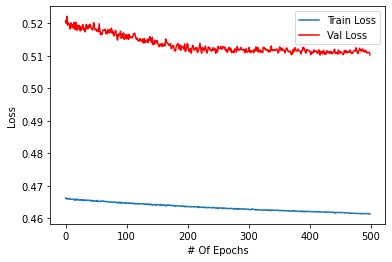

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Saved_Projects/assets
Train Accuracy: 81.14 % 
Val Accuracy: 79.32 %
INFO:tensorflow:Assets written to: Saved_Projects/assets
Train Accuracy: 81.29 % 
Val Accuracy: 80.04 %


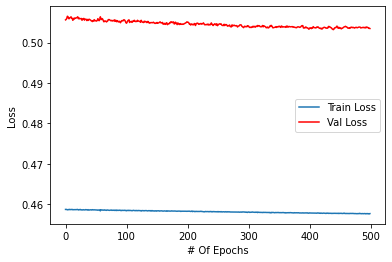

INFO:tensorflow:Assets written to: Saved_Projects/assets
Train Accuracy: 81.44 % 
Val Accuracy: 80.39 %


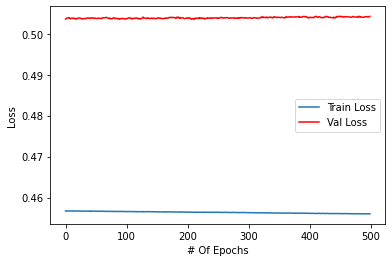

INFO:tensorflow:Assets written to: Saved_Projects/assets
Train Accuracy: 81.29 % 
Val Accuracy: 80.93 %


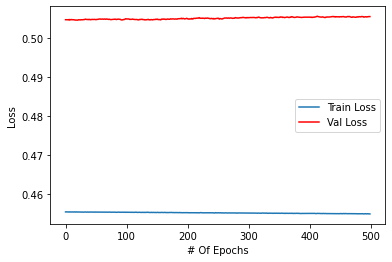

INFO:tensorflow:Assets written to: Saved_Projects/assets
Train Accuracy: 81.52 % 
Val Accuracy: 80.93 %


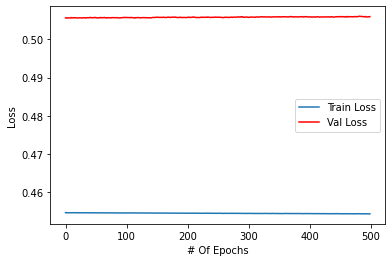

In [52]:
# Train the network
DFPred = []
TrainPred = []
ValPred = []
Models = []
TrainAcc = []
ValAcc = []
for i in tqdm(range(5)):
  models = mlp
  models.fit(x_train, y_train, epochs=500, batch_size=1,validation_data = (x_val, y_val),verbose = 0)
  ModelHis = models.fit(x_train, y_train, epochs=500, batch_size=1, validation_data = (x_val, y_val), verbose = 0).history
  tf.keras.models.save_model(filepath = 'Saved_Projects', model = models)
  TrainAcc.append(ModelHis['accuracy'][-1])
  ValAcc.append(ModelHis['val_accuracy'][-1])
  print('Train Accuracy: %.2f %% \nVal Accuracy: %.2f %%'%(ModelHis['accuracy'][-1]*100,ModelHis['val_accuracy'][-1]*100))
  plt.plot(ModelHis['loss'])
  plt.plot(ModelHis['val_loss'], 'r')
  plt.xlabel("# Of Epochs")
  plt.ylabel("Loss")
  plt.legend(['Train Loss', 'Val Loss'])
  plt.show()
  TrainPred.append(models.predict(x_train))
  ValPred.append(models.predict(x_val))
  ypred = models.predict(x_test)
  DFPred.append(ypred)

In [80]:
# change confidence scores to predictions
PredCopy = DFPred.copy()
PredCopytrain = TrainPred.copy()
PredCopyval = ValPred.copy()
TempPred = []

for i in range(len(PredCopy)):
  for j in range(len(ypred)):
    indices = np.where(PredCopy[i][j] == PredCopy[i][j].max())
    TempPred.append(indices[0][0])
  PredCopy[i] = TempPred
  TempPred = []

TempPred = []

for i in range(len(PredCopytrain)):
  for j in range(len(y_train)):
    indices = np.where(PredCopytrain[i][j] == PredCopytrain[i][j].max())
    TempPred.append(indices[0][0])
  PredCopytrain[i] = TempPred
  TempPred = []

TempPred = []

for i in range(len(PredCopyval)):
  for j in range(len(y_val)):
    indices = np.where(PredCopyval[i][j] == PredCopyval[i][j].max())
    TempPred.append(indices[0][0])
  PredCopyval[i] = TempPred
  TempPred = []

In [81]:
# Convet predictions to numpy array
for i in range(len(PredCopy)):
  PredCopy[i] = np.array(PredCopy[i])
  PredCopytrain[i] = np.array(PredCopytrain[i])
  PredCopyval[i] = np.array(PredCopyval[i])

In [82]:
# Get test accuracies
TestAcc = []
for i in range(len(PredCopy)):
  TestAcc.append(AccuracyTest(y_test, PredCopy[i]))

In [83]:
# Test Accuracies
print(TestAcc)
print("Max Test Acc = " , max(TestAcc))
print("Min Test Acc = " , min(TestAcc))
print("Avg Test Acc = " , (sum(TestAcc) / len(TestAcc)))

[77.00534759358288, 77.36185383244207, 77.36185383244207, 77.54010695187165, 78.07486631016043]
Max Test Acc =  78.07486631016043
Min Test Acc =  77.00534759358288
Avg Test Acc =  77.46880570409982


In [84]:
# Train Accuracies
TrainAcc = [i * 100 for i in TrainAcc]
print(TrainAcc)
print("Max training Acc = " , max(TrainAcc))
print("Min training Acc = " , min(TrainAcc))
print("Avg training Acc = " , (sum(TrainAcc) / len(TrainAcc)))

[81.13783597946167, 81.29056692123413, 81.44329786300659, 81.29056692123413, 81.51966333389282]
Max training Acc =  81.51966333389282
Min training Acc =  81.13783597946167
Avg training Acc =  81.33638620376587


In [85]:
# Aggregation
PredCopy = DFPred.copy()
maxCon = []
indicesCon = []
Confed = [None] * len(ypred)
predCon = [None] * len(ypred)
indicesPred = []

for i in range(len(ypred)):
  for j in range(len(PredCopy)):
    maxCon.append(PredCopy[j][i].max())
    index = np.where(PredCopy[j][i] == PredCopy[j][i].max())
    indicesCon.append(index[0][0])
  indicesCon = np.array(indicesCon)
  indicesCon = indicesCon.T
  maxCon = np.array(maxCon)
  maxCon = maxCon.T
  Confed[i] = maxCon
  predCon[i] = indicesCon
  indicesCon = []
  maxCon = []

for i in range(len(ypred)):
  index = np.where(Confed[i] == Confed[i].max())
  indicesPred.append(index[0][0])

AggY_pred = []
for i in range(len(ypred)):
  AggY_pred.append(predCon[i][indicesPred[i]])

AggY_pred = np.array(AggY_pred)
print("Aggregated Model Accuracy : ", AccuracyTest(y_test, AggY_pred))

Aggregated Model Accuracy :  77.89661319073083


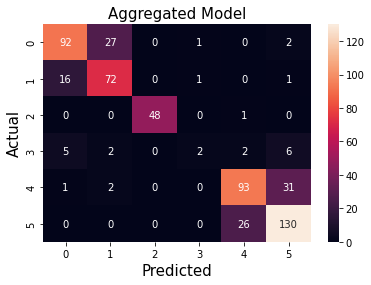

In [86]:
# Confusion Matrix
Cf = ConfusionMatrix(y_test, AggY_pred)
PLOT_ConfusionMatrix(Cf,"Aggregated Model")

In [87]:
# Change One hot to original format (1 column)
y_trainV2 = []
for i in range(len(y_train)):
  index = np.where(y_train[i] == y_train[i].max())
  y_trainV2.append(index[0][0])
y_trainV2 = np.array(y_trainV2)

y_ValV2 = []
for i in range(len(y_val)):
  index = np.where(y_val[i] == y_val[i].max())
  y_ValV2.append(index[0][0])
y_ValV2 = np.array(y_ValV2)

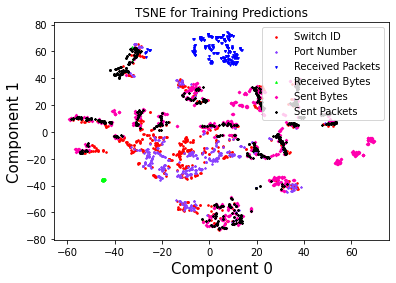

In [88]:
# TSNE for Training
trainLabels = list(x_train.columns)
XTsneTrain = T_SNE(x_train)
XTsneTrain = pd.concat([pd.DataFrame(XTsneTrain), pd.DataFrame(PredCopytrain[TrainAcc.index(max(TrainAcc))])],axis=1 , ignore_index = True).astype(float)
TrainlsofClss = GetListOfClasses(6, XTsneTrain, XTsneTrain.columns[2])
PlotDataPoints(6, TrainlsofClss, 'Component 0', 'Component 1' ,trainLabels ,3, 'TSNE for Training Predictions').show()

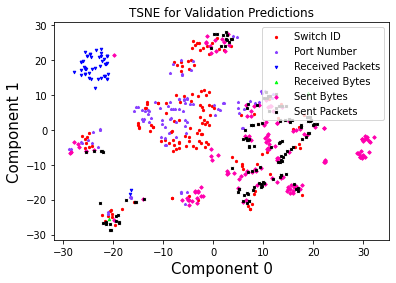

In [89]:
# TSNE for Val
valLabels = list(x_val.columns)
XTsneVal = T_SNE(x_val)
XTsneVal = pd.concat([pd.DataFrame(XTsneVal), pd.DataFrame(PredCopyval[ValAcc.index(max(ValAcc))])],axis=1 , ignore_index = True).astype(float)
VallsofClss = GetListOfClasses(6, XTsneVal, XTsneVal.columns[2])
PlotDataPoints(6, VallsofClss, 'Component 0', 'Component 1' ,valLabels ,6, 'TSNE for Validation Predictions').show()

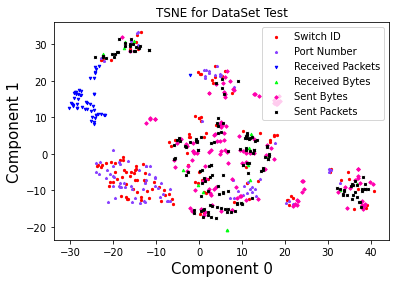

In [90]:
# TSNE for Test
testLabels = list(x_test.columns)
XTsneTest = T_SNE(x_test)
XTsneTest = pd.concat([pd.DataFrame(XTsneTest), pd.DataFrame(y_test)],axis=1 , ignore_index = True).astype(float)
testlsofClss = GetListOfClasses(6, XTsneTest, XTsneTest.columns[2])
PlotDataPoints(6, testlsofClss, 'Component 0', 'Component 1' ,testLabels ,6, 'TSNE for DataSet Test').show()

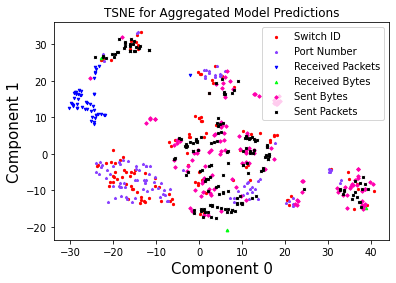

In [91]:
# TSNE for test Predictions
testLabels = list(x_test.columns)
XTsneTestAgg = T_SNE(x_test)
XTsneTestAgg = pd.concat([pd.DataFrame(XTsneTestAgg), pd.DataFrame(AggY_pred)],axis=1 , ignore_index = True).astype(float)
testlsofClssAgg = GetListOfClasses(6, XTsneTestAgg, XTsneTestAgg.columns[2])
PlotDataPoints(6, testlsofClssAgg, 'Component 0', 'Component 1' ,testLabels ,6, 'TSNE for Aggregated Model Predictions').show()

# <font color='#18A558'>**Q2) Compre dimensionality reduction to feature selection**</font>
---



### <font color='#18A558'>**Q2.1) Dimensionality reduction**</font>
---



In [102]:
# Train the network with PCA
components = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
TestPca = []
TrainPca = []
TrainPredPca = []
TestPredPca = []
for i in tqdm(range(20)):
  mlpPca = keras.models.Sequential()
  mlpPca.add(Dense(10, activation='relu', input_shape=(components[i],)))
  mlpPca.add(Dense(6, activation='softmax'))
  optimizerAdamW = tf.optimizers.Adam(learning_rate=0.001,decay = 0.00001)
  mlpPca.compile(loss='categorical_crossentropy', optimizer=optimizerAdamW, metrics=['accuracy'])

  models = mlpPca

  pca = PCA(n_components = components[i],  random_state=0)
  xTrainPca = pca.fit_transform(x_train)
  xTestPca = pca.fit_transform(x_test)

  models.fit(xTrainPca, y_train, epochs=500, batch_size=258, verbose=0)
  ModelHis = models.fit(xTrainPca, y_train, epochs=500, batch_size=258, verbose = 0).history

  TestPca.append(models.evaluate(xTestPca,y_testV2, verbose=0)[1])
  TrainPca.append(ModelHis['accuracy'][-1]*100)

  TrainPredPca.append(models.predict(xTrainPca))
  TestPredPca.append(models.predict(xTestPca))

100%|██████████| 20/20 [02:00<00:00,  6.00s/it]


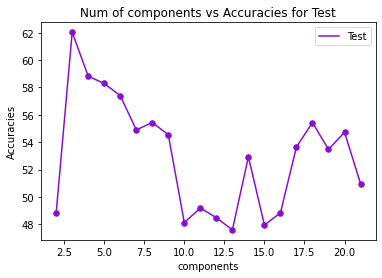

In [103]:
# Plot number of components vs Accuracies for Test
TestPca = [i * 100 for i in TestPca]
Plot(components,TestPca,"Test","#880ED4", "o" , 30 , "components" , "Accuracies" , "Num of components vs Accuracies for Test")
plt.show()

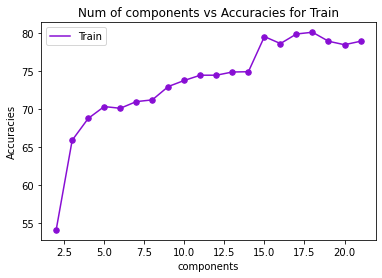

In [104]:
# Plot number of components vs Accuracies for Train
Plot(components,TrainPca,"Train","#880ED4", "o" , 30 , "components" , "Accuracies" , "Num of components vs Accuracies for Train")
plt.show()

In [105]:
predcpyPcaTest = TestPredPca.copy()
predcpyPcaTrain = TrainPredPca.copy()
TempPred = []

for i in range(len(predcpyPcaTest)):
  for j in range(len(ypred)):
    indices = np.where(predcpyPcaTest[i][j] == predcpyPcaTest[i][j].max())
    TempPred.append(indices[0][0])
  predcpyPcaTest[i] = TempPred
  TempPred = []
TempPred = []

for i in range(len(predcpyPcaTrain)):
  for j in range(len(y_train)):
    indices = np.where(predcpyPcaTrain[i][j] == predcpyPcaTrain[i][j].max())
    TempPred.append(indices[0][0])
  predcpyPcaTrain[i] = TempPred
  TempPred = []
TempPred = []

# Convet predictions to numpy array
for i in range(len(predcpyPcaTrain)):
  predcpyPcaTest[i] = np.array(predcpyPcaTest[i])
  predcpyPcaTrain[i] = np.array(predcpyPcaTrain[i])

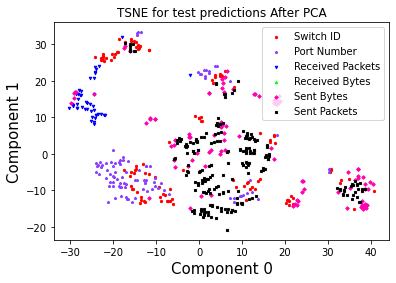

In [106]:
# TSNE for test After DR
XTsneTestPca = T_SNE(x_test)
XTsneTestPca = pd.concat([pd.DataFrame(XTsneTestPca), pd.DataFrame(predcpyPcaTest[TestPca.index(max(TestPca))])],axis=1 , ignore_index = True).astype(float)
testlsofClssPca = GetListOfClasses(6, XTsneTestPca, XTsneTestPca.columns[2])
PlotDataPoints(6, testlsofClssPca, 'Component 0', 'Component 1' ,testLabels ,6, 'TSNE for test predictions After PCA').show()

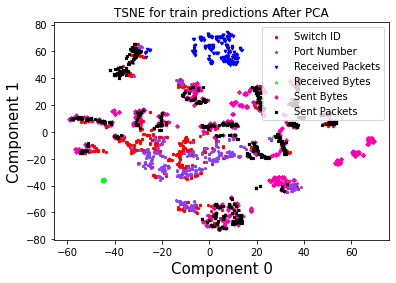

In [107]:
# TSNE for train After DR
XTsneTrainPca = T_SNE(x_train)
XTsneTrainPca = pd.concat([pd.DataFrame(XTsneTrainPca), pd.DataFrame(predcpyPcaTrain[TrainPca.index(max(TrainPca))])],axis=1 , ignore_index = True).astype(float)
trainlsofClssPca = GetListOfClasses(6, XTsneTrainPca, XTsneTrainPca.columns[2])
PlotDataPoints(6, trainlsofClssPca, 'Component 0', 'Component 1' ,testLabels ,6, 'TSNE for train predictions After PCA').show()

### <font color='#18A558'>**Q2.2) Feature Selection**</font>
---



In [108]:
# Train the network with ANOVA
features = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
TestANOVA = []
TrainANOVA = []
TrainPredANOVA = []
TestPredANOVA = []
for i in tqdm(range(20)):
  mlpANOVA = keras.models.Sequential()
  mlpANOVA.add(Dense(10, activation='relu', input_shape=(features[i],)))
  mlpANOVA.add(Dense(6, activation='softmax'))
  optimizerAdamW = tf.optimizers.Adam(learning_rate=0.001,decay = 0.00001)
  mlpANOVA.compile(loss='categorical_crossentropy', optimizer=optimizerAdamW, metrics=['accuracy'])

  models = mlpANOVA
  ANOVA = SelectKBest(f_classif, k=features[i])
  xTrainANOVA = ANOVA.fit_transform(x_train, y_trainV2)
  xTestANOVA = ANOVA.fit_transform(x_test, y_test)

  models.fit(xTrainANOVA, y_train, epochs=500, batch_size=258, verbose=0)
  ModelHis = models.fit(xTrainANOVA, y_train, epochs=500, batch_size=258, verbose = 0).history

  TestANOVA.append(models.evaluate(xTestANOVA,y_testV2, verbose=0)[1])
  TrainANOVA.append(ModelHis['accuracy'][-1]*100)

  TrainPredANOVA.append(models.predict(xTrainANOVA))
  TestPredANOVA.append(models.predict(xTestANOVA))   

100%|██████████| 20/20 [01:58<00:00,  5.90s/it]


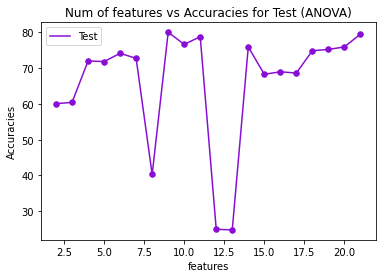

In [109]:
# Plot number of features vs Accuracies for Test
TestANOVA = [i * 100 for i in TestANOVA]
Plot(features,TestANOVA,"Test","#880ED4", "o" , 30 , "features" , "Accuracies" , "Num of features vs Accuracies for Test (ANOVA)")
plt.show()

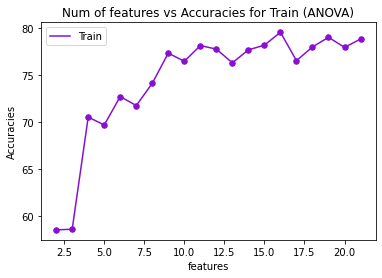

In [110]:
# Plot number of features vs Accuracies for Train
Plot(features,TrainANOVA,"Train","#880ED4", "o" , 30 , "features" , "Accuracies" , "Num of features vs Accuracies for Train (ANOVA)")
plt.show()

In [112]:
predcpyANOVATest = TestPredANOVA.copy()
predcpyANOVATrain = TrainPredANOVA.copy()
TempPred = []

for i in range(len(predcpyANOVATest)):
  for j in range(len(ypred)):
    indices = np.where(predcpyANOVATest[i][j] == predcpyANOVATest[i][j].max())
    TempPred.append(indices[0][0])
  predcpyANOVATest[i] = TempPred
  TempPred = []
TempPred = []

for i in range(len(predcpyANOVATrain)):
  for j in range(len(y_train)):
    indices = np.where(predcpyANOVATrain[i][j] == predcpyANOVATrain[i][j].max())
    TempPred.append(indices[0][0])
  predcpyANOVATrain[i] = TempPred
  TempPred = []
TempPred = []

# Convet predictions to numpy array
for i in range(len(predcpyPcaTrain)):
  predcpyANOVATest[i] = np.array(predcpyANOVATest[i])
  predcpyANOVATrain[i] = np.array(predcpyANOVATrain[i])

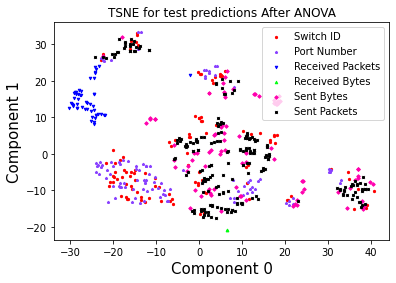

In [113]:
# TSNE for test After ANOVA
XTsneTestANOVA = T_SNE(x_test)
XTsneTestANOVA = pd.concat([pd.DataFrame(XTsneTestANOVA), pd.DataFrame(predcpyANOVATest[TestANOVA.index(max(TestANOVA))])],axis=1 , ignore_index = True).astype(float)
testlsofClssANOVA = GetListOfClasses(6, XTsneTestANOVA, XTsneTestANOVA.columns[2])
PlotDataPoints(6, testlsofClssANOVA, 'Component 0', 'Component 1' ,testLabels ,6, 'TSNE for test predictions After ANOVA').show()

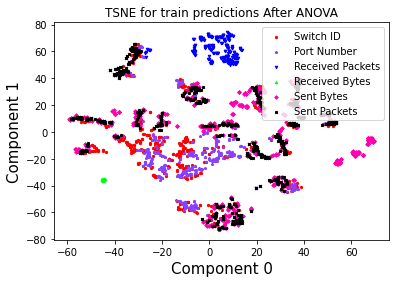

In [114]:
# TSNE for train After ANOVA
XTsneTrainANOVA = T_SNE(x_train)
XTsneTrainANOVA = pd.concat([pd.DataFrame(XTsneTrainANOVA), pd.DataFrame(predcpyANOVATrain[TrainANOVA.index(max(TrainANOVA))])],axis=1 , ignore_index = True).astype(float)
trainlsofClssANOVA = GetListOfClasses(6, XTsneTrainANOVA, XTsneTrainANOVA.columns[2])
PlotDataPoints(6, trainlsofClssANOVA, 'Component 0', 'Component 1' ,testLabels ,6, 'TSNE for train predictions After ANOVA').show()

In [116]:
# Train the network with Matual information
features = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
TestMATUAL = []
TrainMATUAL = []
TrainPredMATUAL = []
TestPredMATUAL = []
for i in tqdm(range(20)):
  mlpMATUAL = keras.models.Sequential()
  mlpMATUAL.add(Dense(10, activation='relu', input_shape=(features[i],)))
  mlpMATUAL.add(Dense(6, activation='softmax'))
  optimizerAdamW = tf.optimizers.Adam(learning_rate=0.001,decay = 0.00001)
  mlpMATUAL.compile(loss='categorical_crossentropy', optimizer=optimizerAdamW, metrics=['accuracy'])

  models = mlpMATUAL
  MATUAL = SelectKBest(score_func=mutual_info_classif, k=features[i])
  xTrainMATUAL = MATUAL.fit_transform(x_train, y_trainV2)
  xTestMATUAL = MATUAL.fit_transform(x_test, y_test)

  models.fit(xTrainMATUAL, y_train, epochs=500, batch_size=258, verbose=0)
  ModelHis = models.fit(xTrainMATUAL, y_train, epochs=500, batch_size=258, verbose = 0).history

  TestMATUAL.append(models.evaluate(xTestMATUAL,y_testV2, verbose=0)[1])
  TrainMATUAL.append(ModelHis['accuracy'][-1]*100)

  TrainPredMATUAL.append(models.predict(xTrainMATUAL))
  TestPredMATUAL.append(models.predict(xTestMATUAL))

100%|██████████| 20/20 [02:05<00:00,  6.30s/it]


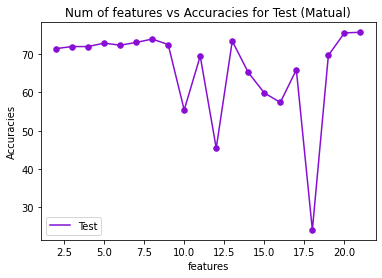

In [117]:
# Plot number of features vs Accuracies for Test
TestMATUAL = [i * 100 for i in TestMATUAL]
Plot(features,TestMATUAL,"Test","#880ED4", "o" , 30 , "features" , "Accuracies" , "Num of features vs Accuracies for Test (Matual)")
plt.show()

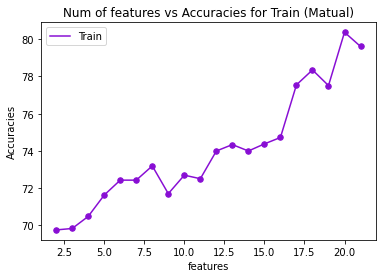

In [118]:
# Plot number of features vs Accuracies for Train
Plot(features,TrainMATUAL,"Train","#880ED4", "o" , 30 , "features" , "Accuracies" , "Num of features vs Accuracies for Train (Matual)")
plt.show()

In [119]:
predcpyMATUALTest = TestPredMATUAL.copy()
predcpyMATUALTrain = TrainPredMATUAL.copy()
TempPred = []

for i in range(len(predcpyMATUALTest)):
  for j in range(len(ypred)):
    indices = np.where(predcpyMATUALTest[i][j] == predcpyMATUALTest[i][j].max())
    TempPred.append(indices[0][0])
  predcpyMATUALTest[i] = TempPred
  TempPred = []
TempPred = []

for i in range(len(predcpyMATUALTrain)):
  for j in range(len(y_train)):
    indices = np.where(predcpyMATUALTrain[i][j] == predcpyMATUALTrain[i][j].max())
    TempPred.append(indices[0][0])
  predcpyMATUALTrain[i] = TempPred
  TempPred = []
TempPred = []

# Convet predictions to numpy array
for i in range(len(predcpyPcaTrain)):
  predcpyMATUALTest[i] = np.array(predcpyMATUALTest[i])
  predcpyMATUALTrain[i] = np.array(predcpyMATUALTrain[i])

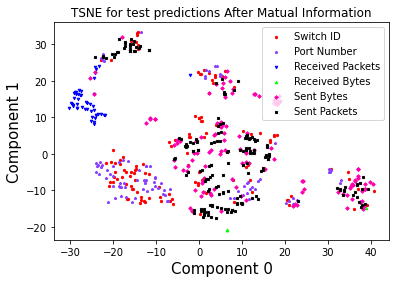

In [120]:
# TSNE for test After Matual information
XTsneTestMATUAL = T_SNE(x_test)
XTsneTestMATUAL = pd.concat([pd.DataFrame(XTsneTestMATUAL), pd.DataFrame(predcpyMATUALTest[TestMATUAL.index(max(TestMATUAL))])],axis=1 , ignore_index = True).astype(float)
testlsofClssMATUAL = GetListOfClasses(6, XTsneTestMATUAL, XTsneTestMATUAL.columns[2])
PlotDataPoints(6, testlsofClssMATUAL, 'Component 0', 'Component 1' ,testLabels ,6, 'TSNE for test predictions After Matual Information').show()

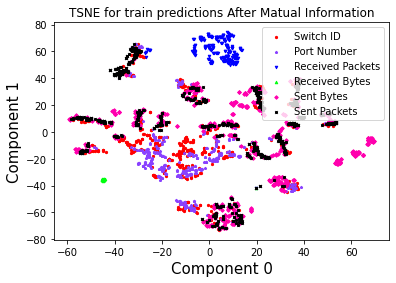

In [121]:
# TSNE for train After Matual information
XTsneTrainMATUAL = T_SNE(x_train)
XTsneTrainMATUAL = pd.concat([pd.DataFrame(XTsneTrainMATUAL), pd.DataFrame(predcpyMATUALTrain[TrainMATUAL.index(max(TrainMATUAL))])],axis=1 , ignore_index = True).astype(float)
trainlsofClssMATUAL = GetListOfClasses(6, XTsneTrainMATUAL, XTsneTrainMATUAL.columns[2])
PlotDataPoints(6, trainlsofClssMATUAL, 'Component 0', 'Component 1' ,testLabels ,6, 'TSNE for train predictions After Matual Information').show()

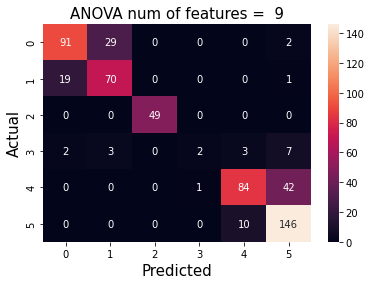

In [123]:
# Best Model
if max([max(TestMATUAL),max(TestANOVA),max(TestPca)]) in TestMATUAL:

  indexOfMax = TestMATUAL.index(max(TestMATUAL))  
  MATUAL = SelectKBest(score_func=mutual_info_classif, k=features[indexOfMax])
  NewX_train = MATUAL.fit_transform(x_train, y_trainV2)
  NewX_test = MATUAL.fit_transform(x_test, y_test)
  NewX_val = MATUAL.fit_transform(x_val, y_ValV2)
  Cf = ConfusionMatrix(y_test, predcpyMATUALTest[features[indexOfMax]])
  PLOT_ConfusionMatrix(Cf,f'Matual information num of features =  {features[indexOfMax]}')

elif max([max(TestMATUAL),max(TestANOVA),max(TestPca)]) in TestANOVA:

  indexOfMax = TestANOVA.index(max(TestANOVA))
  ANOVA = SelectKBest(f_classif, k=features[indexOfMax])
  NewX_train = ANOVA.fit_transform(x_train, y_trainV2)
  NewX_test = ANOVA.fit_transform(x_test, y_test)
  NewX_val = ANOVA.fit_transform(x_val, y_ValV2)
  Cf = ConfusionMatrix(y_test, predcpyANOVATest[features[indexOfMax]])
  PLOT_ConfusionMatrix(Cf,f'ANOVA num of features =  {features[indexOfMax]}')
  
else :
  indexOfMax = TestPca.index(max(TestPca))
  pca = PCA(n_components = components[indexOfMax],  random_state=0)
  NewX_train = pca.fit_transform(x_train)
  NewX_test = pca.fit_transform(x_test)
  NewX_val = pca.fit_transform(x_val)
  Cf = ConfusionMatrix(y_test, predcpyPcaTest[components[indexOfMax]])
  PLOT_ConfusionMatrix(Cf,f'PCA num of components =  {components[indexOfMax]}')

In [175]:
TestANOVA

[60.07130146026611,
 60.42780876159668,
 72.01426029205322,
 71.83600664138794,
 74.15329813957214,
 72.72727489471436,
 40.28520584106445,
 80.03565073013306,
 76.64884328842163,
 78.78788113594055,
 24.95543658733368,
 24.777182936668396,
 75.9358286857605,
 68.27094554901123,
 68.98396015167236,
 68.6274528503418,
 74.86631274223328,
 75.22281408309937,
 75.9358286857605,
 79.5008897781372]

# <font color='#18A558'>**Q3) Vary the MLP parameters**</font>
---



### <font color='#18A558'>**Q3.1) Batch Size**</font>
---



In [124]:
# Train the network Batch Size
TrainAccBatch = []
TestAccBatch = []
for i in [32,64,128]:
  for j in tqdm(range(5)):
    mlpBatch = keras.models.Sequential()
    mlpBatch.add(Dense(10, activation='relu', input_shape=(features[indexOfMax],)))
    mlpBatch.add(Dense(6, activation='softmax'))
    optimizerAdamW = tf.optimizers.Adam(learning_rate=0.001,decay = 0.00001)
    mlpBatch.compile(loss='categorical_crossentropy', optimizer=optimizerAdamW, metrics=['accuracy'])

    models = mlpBatch
    models.fit(NewX_train, y_train, epochs=500, batch_size=i, verbose = 0)
    ModelHis = models.fit(NewX_train, y_train, epochs=500, batch_size=i, verbose = 0).history
    TrainAccBatch.append(ModelHis['accuracy'][-1])
    TestAccBatch.append(models.evaluate(NewX_test,y_testV2, verbose=0)[1])

100%|██████████| 5/5 [00:48<00:00,  9.78s/it]


In [125]:
TrainAccBatch = [i * 100 for i in TrainAccBatch]
print("Max training Acc Batch32 = " , max(TrainAccBatch[0:5]))
print("Min training Acc Batch32 = " , min(TrainAccBatch[0:5]))
print("Avg training Acc Batch32 = " , (sum(TrainAccBatch[0:5]) / len(TrainAccBatch[0:5])))

print("Max training Acc Batch64 = " , max(TrainAccBatch[5:10]))
print("Min training Acc Batch64 = " , min(TrainAccBatch[5:10]))
print("Avg training Acc Batch64 = " , (sum(TrainAccBatch[5:10]) / len(TrainAccBatch[5:10])))

print("Max training Acc Batch128 = " , max(TrainAccBatch[10:15]))
print("Min training Acc Batch128 = " , min(TrainAccBatch[10:15]))
print("Avg training Acc Batch128 = " , (sum(TrainAccBatch[10:15]) / len(TrainAccBatch[10:15])))

Max training Acc Batch32 =  79.8396348953247
Min training Acc Batch32 =  78.23596596717834
Avg training Acc Batch32 =  79.18289422988892
Max training Acc Batch64 =  80.29782176017761
Min training Acc Batch64 =  77.24322080612183
Avg training Acc Batch64 =  79.06834602355957
Max training Acc Batch128 =  78.6177933216095
Min training Acc Batch128 =  78.04505825042725
Avg training Acc Batch128 =  78.4192442893982


In [126]:
TestAccBatch = [i * 100 for i in TestAccBatch]
print("Max testing Acc Batch32 = " , max(TestAccBatch[0:5]))
print("Min testing Acc Batch32 = " , min(TestAccBatch[0:5]))
print("Avg testing Acc Batch32 = " , (sum(TestAccBatch[0:5]) / len(TestAccBatch[0:5])))

print("Max testing Acc Batch64 = " , max(TestAccBatch[5:10]))
print("Min testing Acc Batch64 = " , min(TestAccBatch[5:10]))
print("Avg testing Acc Batch64 = " , (sum(TestAccBatch[5:10]) / len(TestAccBatch[5:10])))

print("Max testing Acc Batch128 = " , max(TestAccBatch[10:15]))
print("Min testing Acc Batch128 = " , min(TestAccBatch[10:15]))
print("Avg testing Acc Batch128 = " , (sum(TestAccBatch[10:15]) / len(TestAccBatch[10:15])))

maxAvg = [(sum(TestAccBatch[0:5]) / len(TestAccBatch[0:5])) , (sum(TestAccBatch[5:10]) / len(TestAccBatch[5:10])), (sum(TestAccBatch[10:15]) / len(TestAccBatch[10:15]))]

if maxAvg.index(max(maxAvg)) == 0 :
  NewBatch = 32
elif maxAvg.index(max(maxAvg)) == 1 :
  NewBatch = 64
else:
  NewBatch = 128

Max testing Acc Batch32 =  81.63992762565613
Min testing Acc Batch32 =  78.78788113594055
Avg testing Acc Batch32 =  80.14260292053223
Max testing Acc Batch64 =  81.63992762565613
Min testing Acc Batch64 =  79.14438247680664
Avg testing Acc Batch64 =  80.42780637741089
Max testing Acc Batch128 =  80.21390438079834
Min testing Acc Batch128 =  78.78788113594055
Avg testing Acc Batch128 =  79.39393997192383


### <font color='#18A558'>**Q3.2) Hidden layers vs. neurons/layer**</font>
---



In [143]:
# Train the network 1 hidden layer
TrainAcc1Hiiden = []
TestAcc1Hiiden = []
for i in [10,20,30,40]:
  for j in tqdm(range(5)):
    mlpHidden1 = keras.models.Sequential()
    mlpHidden1.add(Dense(i, activation='relu', input_shape=(features[indexOfMax],)))
    mlpHidden1.add(Dense(6, activation='softmax'))
    optimizerAdamW = tf.optimizers.Adam(learning_rate=0.001,decay = 0.00001)
    mlpHidden1.compile(loss='categorical_crossentropy', optimizer=optimizerAdamW, metrics=['accuracy'])

    models = mlpHidden1
    models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0)
    ModelHis = models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0).history
    TrainAcc1Hiiden.append(ModelHis['accuracy'][-1])
    TestAcc1Hiiden.append(models.evaluate(NewX_test,y_testV2, verbose=0)[1])

100%|██████████| 5/5 [01:18<00:00, 15.77s/it]


In [144]:
TrainAcc1Hiiden = [i * 100 for i in TrainAcc1Hiiden]
print("Max training Acc 10 nurons = " , max(TrainAcc1Hiiden[0:5]))
print("Min training Acc 10 nurons = " , min(TrainAcc1Hiiden[0:5]))
print("Avg training Acc 10 nurons = " , (sum(TrainAcc1Hiiden[0:5]) / len(TrainAcc1Hiiden[0:5])))

print("Max training Acc 20 nurons = " , max(TrainAcc1Hiiden[5:10]))
print("Min training Acc 20 nurons = " , min(TrainAcc1Hiiden[5:10]))
print("Avg training Acc 20 nurons = " , (sum(TrainAcc1Hiiden[5:10]) / len(TrainAcc1Hiiden[5:10])))

print("Max training Acc 30 nurons = " , max(TrainAcc1Hiiden[10:15]))
print("Min training Acc 30 nurons = " , min(TrainAcc1Hiiden[10:15]))
print("Avg training Acc 30 nurons = " , (sum(TrainAcc1Hiiden[10:15]) / len(TrainAcc1Hiiden[10:15])))

print("Max training Acc 40 nurons = " , max(TrainAcc1Hiiden[15:20]))
print("Min training Acc 40 nurons = " , min(TrainAcc1Hiiden[15:20]))
print("Avg training Acc 40 nurons = " , (sum(TrainAcc1Hiiden[15:20]) / len(TrainAcc1Hiiden[15:20])))

Max training Acc 10 nurons =  79.95418310165405
Min training Acc 10 nurons =  78.15960049629211
Avg training Acc 10 nurons =  79.09125566482544
Max training Acc 20 nurons =  82.24512934684753
Min training Acc 20 nurons =  80.41236996650696
Avg training Acc 20 nurons =  81.32111430168152
Max training Acc 30 nurons =  82.77968764305115
Min training Acc 30 nurons =  81.90149068832397
Avg training Acc 30 nurons =  82.54295587539673
Max training Acc 40 nurons =  84.19243693351746
Min training Acc 40 nurons =  83.27605724334717
Avg training Acc 40 nurons =  83.84116053581238


In [145]:
TestAcc1Hiiden = [i * 100 for i in TestAcc1Hiiden]
print("Max Testing Acc 10 nurons = " , max(TestAcc1Hiiden[0:5]))
print("Min Testing Acc 10 nurons = " , min(TestAcc1Hiiden[0:5]))
print("Avg Testing Acc 10 nurons = " , (sum(TestAcc1Hiiden[0:5]) / len(TestAcc1Hiiden[0:5])))

print("Max Testing Acc 20 nurons = " , max(TestAcc1Hiiden[5:10]))
print("Min Testing Acc 20 nurons = " , min(TestAcc1Hiiden[5:10]))
print("Avg Testing Acc 20 nurons = " , (sum(TestAcc1Hiiden[5:10]) / len(TestAcc1Hiiden[5:10])))

print("Max Testing Acc 30 nurons = " , max(TestAcc1Hiiden[10:15]))
print("Min Testing Acc 30 nurons = " , min(TestAcc1Hiiden[10:15]))
print("Avg Testing Acc 30 nurons = " , (sum(TestAcc1Hiiden[10:15]) / len(TestAcc1Hiiden[10:15])))

print("Max Testing Acc 40 nurons = " , max(TestAcc1Hiiden[15:20]))
print("Min Testing Acc 40 nurons = " , min(TestAcc1Hiiden[15:20]))
print("Avg Testing Acc 40 nurons = " , (sum(TestAcc1Hiiden[15:20]) / len(TestAcc1Hiiden[15:20])))

Max Testing Acc 10 nurons =  81.46167397499084
Min Testing Acc 10 nurons =  78.60962748527527
Avg Testing Acc 10 nurons =  80.21390318870544
Max Testing Acc 20 nurons =  83.2442045211792
Min Testing Acc 20 nurons =  80.74866533279419
Avg Testing Acc 20 nurons =  81.60427808761597
Max Testing Acc 30 nurons =  84.3137264251709
Min Testing Acc 30 nurons =  82.70944952964783
Avg Testing Acc 30 nurons =  83.52941155433655
Max Testing Acc 40 nurons =  85.38324236869812
Min Testing Acc 40 nurons =  83.06595087051392
Avg Testing Acc 40 nurons =  84.02851939201355


In [146]:
# Train the network 2 hidden layer
TrainAcc2Hiiden = []
TestAcc2Hiiden = []
for i in [10,20,30,40]:
  for j in tqdm(range(5)):
    mlpHidden2 = keras.models.Sequential()
    mlpHidden2.add(Dense(i, activation='relu', input_shape=(features[indexOfMax],)))
    mlpHidden2.add(Dense(i, activation='relu'))
    mlpHidden2.add(Dense(6, activation='softmax'))
    optimizerAdamW = tf.optimizers.Adam(learning_rate=0.001,decay = 0.00001)
    mlpHidden2.compile(loss='categorical_crossentropy', optimizer=optimizerAdamW, metrics=['accuracy'])

    models = mlpHidden2
    models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0)
    ModelHis = models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0).history
    TrainAcc2Hiiden.append(ModelHis['accuracy'][-1])
    TestAcc2Hiiden.append(models.evaluate(NewX_test,y_testV2, verbose=0)[1])

100%|██████████| 5/5 [01:42<00:00, 20.57s/it]


In [147]:
TrainAcc2Hiiden = [i * 100 for i in TrainAcc2Hiiden]
print("Max training Acc 10 nurons = " , max(TrainAcc2Hiiden[0:5]))
print("Min training Acc 10 nurons = " , min(TrainAcc2Hiiden[0:5]))
print("Avg training Acc 10 nurons = " , (sum(TrainAcc2Hiiden[0:5]) / len(TrainAcc2Hiiden[0:5])))

print("Max training Acc 20 nurons = " , max(TrainAcc2Hiiden[5:10]))
print("Min training Acc 20 nurons = " , min(TrainAcc2Hiiden[5:10]))
print("Avg training Acc 20 nurons = " , (sum(TrainAcc2Hiiden[5:10]) / len(TrainAcc2Hiiden[5:10])))

print("Max training Acc 30 nurons = " , max(TrainAcc2Hiiden[10:15]))
print("Min training Acc 30 nurons = " , min(TrainAcc2Hiiden[10:15]))
print("Avg training Acc 30 nurons = " , (sum(TrainAcc2Hiiden[10:15]) / len(TrainAcc2Hiiden[10:15])))

print("Max training Acc 40 nurons = " , max(TrainAcc2Hiiden[15:20]))
print("Min training Acc 40 nurons = " , min(TrainAcc2Hiiden[15:20]))
print("Avg training Acc 40 nurons = " , (sum(TrainAcc2Hiiden[15:20]) / len(TrainAcc2Hiiden[15:20])))

Max training Acc 10 nurons =  82.20694661140442
Min training Acc 10 nurons =  79.87781763076782
Avg training Acc 10 nurons =  81.42038941383362
Max training Acc 20 nurons =  85.29973030090332
Min training Acc 20 nurons =  83.73425006866455
Avg training Acc 20 nurons =  84.45971727371216
Max training Acc 30 nurons =  86.59793734550476
Min training Acc 30 nurons =  85.18518805503845
Avg training Acc 30 nurons =  86.20847582817078
Max training Acc 40 nurons =  87.47613430023193
Min training Acc 40 nurons =  86.29247546195984
Avg training Acc 40 nurons =  86.83466911315918


In [148]:
TestAcc2Hiiden = [i * 100 for i in TestAcc2Hiiden]
print("Max Testing Acc 10 nurons = " , max(TestAcc2Hiiden[0:5]))
print("Min Testing Acc 10 nurons = " , min(TestAcc2Hiiden[0:5]))
print("Avg Testing Acc 10 nurons = " , (sum(TestAcc2Hiiden[0:5]) / len(TestAcc2Hiiden[0:5])))

print("Max Testing Acc 20 nurons = " , max(TestAcc2Hiiden[5:10]))
print("Min Testing Acc 20 nurons = " , min(TestAcc2Hiiden[5:10]))
print("Avg Testing Acc 20 nurons = " , (sum(TestAcc2Hiiden[5:10]) / len(TestAcc2Hiiden[5:10])))

print("Max Testing Acc 30 nurons = " , max(TestAcc2Hiiden[10:15]))
print("Min Testing Acc 30 nurons = " , min(TestAcc2Hiiden[10:15]))
print("Avg Testing Acc 30 nurons = " , (sum(TestAcc2Hiiden[10:15]) / len(TestAcc2Hiiden[10:15])))

print("Max Testing Acc 40 nurons = " , max(TestAcc2Hiiden[15:20]))
print("Min Testing Acc 40 nurons = " , min(TestAcc2Hiiden[15:20]))
print("Avg Testing Acc 40 nurons = " , (sum(TestAcc2Hiiden[15:20]) / len(TestAcc2Hiiden[15:20])))

Max Testing Acc 10 nurons =  83.60071182250977
Min Testing Acc 10 nurons =  80.92691898345947
Avg Testing Acc 10 nurons =  82.10338711738586
Max Testing Acc 20 nurons =  85.02673506736755
Min Testing Acc 20 nurons =  81.63992762565613
Avg Testing Acc 20 nurons =  83.31550717353821
Max Testing Acc 30 nurons =  86.98752522468567
Min Testing Acc 30 nurons =  81.28342032432556
Avg Testing Acc 30 nurons =  84.20677423477173
Max Testing Acc 40 nurons =  85.38324236869812
Min Testing Acc 40 nurons =  82.70944952964783
Avg Testing Acc 40 nurons =  83.95721912384033


In [149]:
# Train the network 4 hidden layer
TrainAcc4Hiiden = []
TestAcc4Hiiden = []
for i in [10,20,30,40]:
  for j in tqdm(range(5)):
    mlpHidden4 = keras.models.Sequential()
    mlpHidden4.add(Dense(i, activation='relu', input_shape=(features[indexOfMax],)))
    mlpHidden4.add(Dense(i, activation='relu'))
    mlpHidden4.add(Dense(i, activation='relu'))
    mlpHidden4.add(Dense(i, activation='relu'))
    mlpHidden4.add(Dense(6, activation='softmax'))
    optimizerAdamW = tf.optimizers.Adam(learning_rate=0.001,decay = 0.00001)
    mlpHidden4.compile(loss='categorical_crossentropy', optimizer=optimizerAdamW, metrics=['accuracy'])

    models = mlpHidden4
    models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0)
    ModelHis = models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0).history
    TrainAcc4Hiiden.append(ModelHis['accuracy'][-1])
    TestAcc4Hiiden.append(models.evaluate(NewX_test,y_testV2, verbose=0)[1])

 20%|██        | 1/5 [00:23<01:32, 23.11s/it]

In [ ]:
TrainAcc4Hiiden = [i * 100 for i in TrainAcc4Hiiden]
print("Max training Acc 10 nurons = " , max(TrainAcc4Hiiden[0:5]))
print("Min training Acc 10 nurons = " , min(TrainAcc4Hiiden[0:5]))
print("Avg training Acc 10 nurons = " , (sum(TrainAcc4Hiiden[0:5]) / len(TrainAcc4Hiiden[0:5])))

print("Max training Acc 20 nurons = " , max(TrainAcc4Hiiden[5:10]))
print("Min training Acc 20 nurons = " , min(TrainAcc4Hiiden[5:10]))
print("Avg training Acc 20 nurons = " , (sum(TrainAcc4Hiiden[5:10]) / len(TrainAcc4Hiiden[5:10])))

print("Max training Acc 30 nurons = " , max(TrainAcc4Hiiden[10:15]))
print("Min training Acc 30 nurons = " , min(TrainAcc4Hiiden[10:15]))
print("Avg training Acc 30 nurons = " , (sum(TrainAcc4Hiiden[10:15]) / len(TrainAcc4Hiiden[10:15])))

print("Max training Acc 40 nurons = " , max(TrainAcc4Hiiden[15:20]))
print("Min training Acc 40 nurons = " , min(TrainAcc4Hiiden[15:20]))
print("Avg training Acc 40 nurons = " , (sum(TrainAcc4Hiiden[15:20]) / len(TrainAcc4Hiiden[15:20])))

In [ ]:
TestAcc4Hiiden = [i * 100 for i in TestAcc4Hiiden]
print("Max Testing Acc 10 nurons = " , max(TestAcc4Hiiden[0:5]))
print("Min Testing Acc 10 nurons = " , min(TestAcc4Hiiden[0:5]))
print("Avg Testing Acc 10 nurons = " , (sum(TestAcc4Hiiden[0:5]) / len(TestAcc4Hiiden[0:5])))

print("Max Testing Acc 20 nurons = " , max(TestAcc4Hiiden[5:10]))
print("Min Testing Acc 20 nurons = " , min(TestAcc4Hiiden[5:10]))
print("Avg Testing Acc 20 nurons = " , (sum(TestAcc4Hiiden[5:10]) / len(TestAcc4Hiiden[5:10])))

print("Max Testing Acc 30 nurons = " , max(TestAcc4Hiiden[10:15]))
print("Min Testing Acc 30 nurons = " , min(TestAcc4Hiiden[10:15]))
print("Avg Testing Acc 30 nurons = " , (sum(TestAcc4Hiiden[10:15]) / len(TestAcc4Hiiden[10:15])))

print("Max Testing Acc 40 nurons = " , max(TestAcc4Hiiden[15:20]))
print("Min Testing Acc 40 nurons = " , min(TestAcc4Hiiden[15:20]))
print("Avg Testing Acc 40 nurons = " , (sum(TestAcc4Hiiden[15:20]) / len(TestAcc4Hiiden[15:20])))

In [152]:
# Train the network 8 hidden layer
TrainAcc8Hiiden = []
TestAcc8Hiiden = []
for i in [10,20,30,40]:
  for j in tqdm(range(5)):
    mlpHidden8 = keras.models.Sequential()
    mlpHidden8.add(Dense(i, activation='relu', input_shape=(features[indexOfMax],)))
    mlpHidden8.add(Dense(i, activation='relu'))
    mlpHidden8.add(Dense(i, activation='relu'))
    mlpHidden8.add(Dense(i, activation='relu'))
    mlpHidden8.add(Dense(i, activation='relu'))
    mlpHidden8.add(Dense(i, activation='relu'))
    mlpHidden8.add(Dense(i, activation='relu'))
    mlpHidden8.add(Dense(i, activation='relu'))
    mlpHidden8.add(Dense(6, activation='softmax'))
    optimizerAdamW = tf.optimizers.Adam(learning_rate=0.001,decay = 0.00001)
    mlpHidden8.compile(loss='categorical_crossentropy', optimizer=optimizerAdamW, metrics=['accuracy'])

    models = mlpHidden8
    models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0)
    ModelHis = models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0).history
    TrainAcc8Hiiden.append(ModelHis['accuracy'][-1])
    TestAcc8Hiiden.append(models.evaluate(NewX_test,y_testV2, verbose=0)[1])

100%|██████████| 5/5 [02:35<00:00, 31.08s/it]


In [153]:
TrainAcc8Hiiden = [i * 100 for i in TrainAcc8Hiiden]
print("Max training Acc 10 nurons = " , max(TrainAcc8Hiiden[0:5]))
print("Min training Acc 10 nurons = " , min(TrainAcc8Hiiden[0:5]))
print("Avg training Acc 10 nurons = " , (sum(TrainAcc8Hiiden[0:5]) / len(TrainAcc8Hiiden[0:5])))

print("Max training Acc 20 nurons = " , max(TrainAcc8Hiiden[5:10]))
print("Min training Acc 20 nurons = " , min(TrainAcc8Hiiden[5:10]))
print("Avg training Acc 20 nurons = " , (sum(TrainAcc8Hiiden[5:10]) / len(TrainAcc8Hiiden[5:10])))

print("Max training Acc 30 nurons = " , max(TrainAcc8Hiiden[10:15]))
print("Min training Acc 30 nurons = " , min(TrainAcc8Hiiden[10:15]))
print("Avg training Acc 30 nurons = " , (sum(TrainAcc8Hiiden[10:15]) / len(TrainAcc8Hiiden[10:15])))

print("Max training Acc 40 nurons = " , max(TrainAcc8Hiiden[15:20]))
print("Min training Acc 40 nurons = " , min(TrainAcc8Hiiden[15:20]))
print("Avg training Acc 40 nurons = " , (sum(TrainAcc8Hiiden[15:20]) / len(TrainAcc8Hiiden[15:20])))

Max training Acc 10 nurons =  84.45971608161926
Min training Acc 10 nurons =  80.90874552726746
Avg training Acc 10 nurons =  83.27605962753296
Max training Acc 20 nurons =  90.37800431251526
Min training Acc 20 nurons =  88.27796578407288
Avg training Acc 20 nurons =  89.33180451393127
Max training Acc 30 nurons =  91.82894229888916
Min training Acc 30 nurons =  90.37800431251526
Avg training Acc 30 nurons =  90.83619594573975
Max training Acc 40 nurons =  92.13440418243408
Min training Acc 40 nurons =  91.37074947357178
Avg training Acc 40 nurons =  91.66093826293945


In [154]:
TestAcc8Hiiden = [i * 100 for i in TestAcc8Hiiden]
print("Max Testing Acc 10 nurons = " , max(TestAcc8Hiiden[0:5]))
print("Min Testing Acc 10 nurons = " , min(TestAcc8Hiiden[0:5]))
print("Avg Testing Acc 10 nurons = " , (sum(TestAcc8Hiiden[0:5]) / len(TestAcc8Hiiden[0:5])))

print("Max Testing Acc 20 nurons = " , max(TestAcc8Hiiden[5:10]))
print("Min Testing Acc 20 nurons = " , min(TestAcc8Hiiden[5:10]))
print("Avg Testing Acc 20 nurons = " , (sum(TestAcc8Hiiden[5:10]) / len(TestAcc8Hiiden[5:10])))

print("Max Testing Acc 30 nurons = " , max(TestAcc8Hiiden[10:15]))
print("Min Testing Acc 30 nurons = " , min(TestAcc8Hiiden[10:15]))
print("Avg Testing Acc 30 nurons = " , (sum(TestAcc8Hiiden[10:15]) / len(TestAcc8Hiiden[10:15])))

print("Max Testing Acc 40 nurons = " , max(TestAcc8Hiiden[15:20]))
print("Min Testing Acc 40 nurons = " , min(TestAcc8Hiiden[15:20]))
print("Avg Testing Acc 40 nurons = " , (sum(TestAcc8Hiiden[15:20]) / len(TestAcc8Hiiden[15:20])))

Avg1hidden = [(sum(TestAcc1Hiiden[0:5]) / len(TestAcc1Hiiden[0:5])), (sum(TestAcc1Hiiden[5:10]) / len(TestAcc1Hiiden[5:10])) , (sum(TestAcc1Hiiden[10:15]) / len(TestAcc1Hiiden[10:15])), (sum(TestAcc1Hiiden[15:20]) / len(TestAcc1Hiiden[15:20]))]
Avg2hidden = [(sum(TestAcc2Hiiden[0:5]) / len(TestAcc2Hiiden[0:5])), (sum(TestAcc2Hiiden[5:10]) / len(TestAcc2Hiiden[5:10])) , (sum(TestAcc2Hiiden[10:15]) / len(TestAcc2Hiiden[10:15])), (sum(TestAcc2Hiiden[15:20]) / len(TestAcc2Hiiden[15:20]))]
Avg4hidden = [(sum(TestAcc4Hiiden[0:5]) / len(TestAcc4Hiiden[0:5])), (sum(TestAcc4Hiiden[5:10]) / len(TestAcc4Hiiden[5:10])) , (sum(TestAcc4Hiiden[10:15]) / len(TestAcc4Hiiden[10:15])), (sum(TestAcc4Hiiden[15:20]) / len(TestAcc4Hiiden[15:20]))]
Avg8hidden = [(sum(TestAcc8Hiiden[0:5]) / len(TestAcc8Hiiden[0:5])), (sum(TestAcc8Hiiden[5:10]) / len(TestAcc8Hiiden[5:10])) , (sum(TestAcc8Hiiden[10:15]) / len(TestAcc8Hiiden[10:15])), (sum(TestAcc8Hiiden[15:20]) / len(TestAcc8Hiiden[15:20]))]

Max Testing Acc 10 nurons =  84.3137264251709
Min Testing Acc 10 nurons =  78.60962748527527
Avg Testing Acc 10 nurons =  82.31729030609131
Max Testing Acc 20 nurons =  85.38324236869812
Min Testing Acc 20 nurons =  82.17468857765198
Avg Testing Acc 20 nurons =  83.42246055603027
Max Testing Acc 30 nurons =  84.49198007583618
Min Testing Acc 30 nurons =  80.39215803146362
Avg Testing Acc 30 nurons =  82.3172914981842
Max Testing Acc 40 nurons =  83.95721912384033
Min Testing Acc 40 nurons =  82.17468857765198
Avg Testing Acc 40 nurons =  83.13725471496582


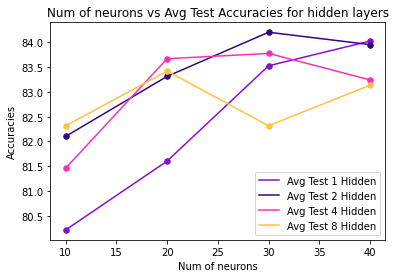

In [155]:
# Plot number of neurons vs the avg test accuracy.
Plot([10,20,30,40],Avg1hidden,"Avg Test 1 Hidden","#880ED4", "o" , 30 , "Num of neurons" , "Accuracies" , "Num of neurons vs Avg Test Accuracies for hidden layers")
Plot([10,20,30,40],Avg2hidden,"Avg Test 2 Hidden","#31087B", "o" , 30 , "Num of neurons" , "Accuracies" , "Num of neurons vs Avg Test Accuracies for hidden layers")
Plot([10,20,30,40],Avg4hidden,"Avg Test 4 Hidden","#FA2FB5", "o" , 30 , "Num of neurons" , "Accuracies" , "Num of neurons vs Avg Test Accuracies for hidden layers")
Plot([10,20,30,40],Avg8hidden,"Avg Test 8 Hidden","#FFC23C", "o" , 30 , "Num of neurons" , "Accuracies" , "Num of neurons vs Avg Test Accuracies for hidden layers")
plt.show()

In [156]:
allAVG = []
for i in [Avg1hidden,Avg2hidden,Avg4hidden,Avg8hidden]:
  allAVG += i

In [157]:
for i in range(len(allAVG)):
  if i == 0 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(10, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 1 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(20, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 2 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(30, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 3 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(40, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(6, activation='softmax'))

  elif i == 4 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(10, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 5 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(20, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 6 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(30, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 7 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(40, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))

  elif i == 8 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(10, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 9 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(20, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 10 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(30, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 11 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(40, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))

  elif i == 12 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(10, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(10, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 13 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(20, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(20, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 14 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(30, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(30, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))
  elif i == 15 and i == allAVG.index(max(allAVG)):
    FinalModel = keras.models.Sequential()
    FinalModel.add(Dense(40, activation='relu', input_shape=(features[indexOfMax],)))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(40, activation='relu'))
    FinalModel.add(Dense(6, activation='softmax'))

### <font color='#18A558'>**Q3.3) Learning rate and different optimizers**</font>
---



In [159]:
# the best model from question 
FinalModel.summary()

Model: "sequential_304"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1050 (Dense)           (None, 30)                300       
_________________________________________________________________
dense_1051 (Dense)           (None, 30)                930       
_________________________________________________________________
dense_1052 (Dense)           (None, 6)                 186       
Total params: 1,416
Trainable params: 1,416
Non-trainable params: 0
_________________________________________________________________


In [161]:
# Train the network AdamW
TrainAccAdamW = []
TestAccAdamW = []
for i in [0.1, 0.01 ,0.001]:
  for j in tqdm(range(5)):
    mlpAdamW = keras.models.Sequential()
    mlpAdamW.add(Dense(30, activation='relu', input_shape=(features[indexOfMax],)))
    mlpAdamW.add(Dense(30, activation='relu'))
    mlpAdamW.add(Dense(6, activation='softmax'))
    optimizerAdamW = tf.optimizers.Adam(learning_rate=0.001,decay = 0.00001)
    mlpAdamW.compile(loss='categorical_crossentropy', optimizer=optimizerAdamW, metrics=['accuracy'])

    models = mlpAdamW
    models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0)
    ModelHis = models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0).history
    TrainAccAdamW.append(ModelHis['accuracy'][-1])
    TestAccAdamW.append(models.evaluate(NewX_test,y_testV2, verbose=0)[1])

100%|██████████| 5/5 [01:40<00:00, 20.13s/it]


In [162]:
# Train the network SGD
TrainAccSGD1 = []
TestAccSGD1 = []
for i in [0.1,0.01,0.001]:
  for j in tqdm(range(5)):
    mlpSGD1 = keras.models.Sequential()
    mlpSGD1.add(Dense(30, activation='relu', input_shape=(features[indexOfMax],)))
    mlpSGD1.add(Dense(30, activation='relu'))
    mlpSGD1.add(Dense(6, activation='softmax'))
    SGD1 = tf.keras.optimizers.SGD(learning_rate=i,momentum=0.1, decay = 0.00001)
    mlpSGD1.compile(loss='categorical_crossentropy', optimizer=SGD1, metrics=['accuracy'])

    models = mlpSGD1
    models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0)
    ModelHis = models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0).history
    TrainAccSGD1.append(ModelHis['accuracy'][-1])
    TestAccSGD1.append(models.evaluate(NewX_test,y_testV2, verbose=0)[1])

100%|██████████| 5/5 [01:21<00:00, 16.33s/it]


In [163]:
# Train the network SGD
TrainAccSGD2 = []
TestAccSGD2 = []
for i in [0.1,0.01,0.001]:
  for j in tqdm(range(5)):
    mlpSGD2 = keras.models.Sequential()
    mlpSGD2.add(Dense(30, activation='relu', input_shape=(features[indexOfMax],)))
    mlpSGD2.add(Dense(30, activation='relu'))
    mlpSGD2.add(Dense(6, activation='softmax'))
    SGD2 = tf.keras.optimizers.SGD(learning_rate=i,momentum=0.5, decay = 0.00001)
    mlpSGD2.compile(loss='categorical_crossentropy', optimizer=SGD2, metrics=['accuracy'])

    models = mlpSGD2
    models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0)
    ModelHis = models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0).history
    TrainAccSGD2.append(ModelHis['accuracy'][-1])
    TestAccSGD2.append(models.evaluate(NewX_test,y_testV2, verbose=0)[1])

100%|██████████| 5/5 [01:19<00:00, 15.96s/it]


In [164]:
# Train the network SGD
TrainAccSGD3 = []
TestAccSGD3 = []
for i in [0.1,0.01,0.001]:
  for j in tqdm(range(5)):
    mlpSGD3 = keras.models.Sequential()
    mlpSGD3.add(Dense(30, activation='relu', input_shape=(features[indexOfMax],)))
    mlpSGD3.add(Dense(30, activation='relu'))
    mlpSGD3.add(Dense(6, activation='softmax'))
    SGD3 = tf.keras.optimizers.SGD(learning_rate=i,momentum=0.9, decay = 0.00001)
    mlpSGD3.compile(loss='categorical_crossentropy', optimizer=SGD3, metrics=['accuracy'])

    models = mlpSGD3
    models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0)
    ModelHis = models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0).history
    TrainAccSGD3.append(ModelHis['accuracy'][-1])
    TestAccSGD3.append(models.evaluate(NewX_test,y_testV2, verbose=0)[1])

100%|██████████| 5/5 [01:20<00:00, 16.08s/it]


In [165]:
TrainAccAdamW = [i * 100 for i in TrainAccAdamW]
print("Max training AdamW 0.1 Lr = " , max(TrainAccAdamW[0:5]))
print("Min training AdamW 0.1 Lr = " , min(TrainAccAdamW[0:5]))
print("Avg training AdamW 0.1 Lr = " , (sum(TrainAccAdamW[0:5]) / len(TrainAccAdamW[0:5])))

print("Max training AdamW 0.01 Lr = " , max(TrainAccAdamW[5:10]))
print("Min training AdamW 0.01 Lr = " , min(TrainAccAdamW[5:10]))
print("Avg training AdamW 0.01 Lr = " , (sum(TrainAccAdamW[5:10]) / len(TrainAccAdamW[5:10])))

print("Max training AdamW 0.001 Lr = " , max(TrainAccAdamW[10:15]))
print("Min training AdamW 0.001 Lr = " , min(TrainAccAdamW[10:15]))
print("Avg training AdamW 0.001 Lr = " , (sum(TrainAccAdamW[10:15]) / len(TrainAccAdamW[10:15])))

Max training AdamW 0.1 Lr =  86.97976469993591
Min training AdamW 0.1 Lr =  85.7579231262207
Avg training AdamW 0.1 Lr =  86.24665975570679
Max training AdamW 0.01 Lr =  86.82703375816345
Min training AdamW 0.01 Lr =  85.56700944900513
Avg training AdamW 0.01 Lr =  86.23138546943665
Max training AdamW 0.001 Lr =  87.28522062301636
Min training AdamW 0.001 Lr =  85.4906439781189
Avg training AdamW 0.001 Lr =  86.36884212493896


In [166]:
TestAccAdamW = [i * 100 for i in TestAccAdamW]
print("Max Testing AdamW 0.1 Lr = " , max(TestAccAdamW[0:5]))
print("Min Testing AdamW 0.1 Lr = " , min(TestAccAdamW[0:5]))
print("Avg Testing AdamW 0.1 Lr = " , (sum(TestAccAdamW[0:5]) / len(TestAccAdamW[0:5])))

print("Max Testing AdamW 0.01 Lr = " , max(TestAccAdamW[5:10]))
print("Min Testing AdamW 0.01 Lr = " , min(TestAccAdamW[5:10]))
print("Avg Testing AdamW 0.01 Lr = " , (sum(TestAccAdamW[5:10]) / len(TestAccAdamW[5:10])))

print("Max Testing AdamW 0.001 Lr = " , max(TestAccAdamW[10:15]))
print("Min Testing AdamW 0.001 Lr = " , min(TestAccAdamW[10:15]))
print("Avg Testing AdamW 0.001 Lr = " , (sum(TestAccAdamW[10:15]) / len(TestAccAdamW[10:15])))

Max Testing AdamW 0.1 Lr =  85.02673506736755
Min Testing AdamW 0.1 Lr =  82.17468857765198
Avg Testing AdamW 0.1 Lr =  83.88591885566711
Max Testing AdamW 0.01 Lr =  84.49198007583618
Min Testing AdamW 0.01 Lr =  82.17468857765198
Avg Testing AdamW 0.01 Lr =  83.49376082420349
Max Testing AdamW 0.001 Lr =  84.84848737716675
Min Testing AdamW 0.001 Lr =  82.88770318031311
Avg Testing AdamW 0.001 Lr =  84.0641725063324


In [167]:
TrainAccSGD1 = [i * 100 for i in TrainAccSGD1]
print("Max training SGD 0.1 Lr & 0.1 momentum = " , max(TrainAccSGD1[0:5]))
print("Min training SGD 0.1 Lr & 0.1 momentum = " , min(TrainAccSGD1[0:5]))
print("Avg training SGD 0.1 Lr & 0.1 momentum = " , (sum(TrainAccSGD1[0:5]) / len(TrainAccSGD1[0:5])))

print("Max training SGD 0.01 Lr & 0.1 momentum = " , max(TrainAccSGD1[5:10]))
print("Min training SGD 0.01 Lr & 0.1 momentum = " , min(TrainAccSGD1[5:10]))
print("Avg training SGD 0.01 Lr & 0.1 momentum = " , (sum(TrainAccSGD1[5:10]) / len(TrainAccSGD1[5:10])))

print("Max training SGD 0.001 Lr & 0.1 momentum = " , max(TrainAccSGD1[10:15]))
print("Min training SGD 0.001 Lr & 0.1 momentum = " , min(TrainAccSGD1[10:15]))
print("Avg training SGD 0.001 Lr & 0.1 momentum = " , (sum(TrainAccSGD1[10:15]) / len(TrainAccSGD1[10:15])))

Max training SGD 0.1 Lr & 0.1 momentum =  86.78885102272034
Min training SGD 0.1 Lr & 0.1 momentum =  86.33065819740295
Avg training SGD 0.1 Lr & 0.1 momentum =  86.60557389259338
Max training SGD 0.01 Lr & 0.1 momentum =  81.90149068832397
Min training SGD 0.01 Lr & 0.1 momentum =  80.0687313079834
Avg training SGD 0.01 Lr & 0.1 momentum =  81.17602229118347
Max training SGD 0.001 Lr & 0.1 momentum =  74.60862994194031
Min training SGD 0.001 Lr & 0.1 momentum =  73.80679845809937
Avg training SGD 0.001 Lr & 0.1 momentum =  74.23444032669067


In [168]:
TestAccSGD1 = [i * 100 for i in TestAccSGD1]
print("Max Testing SGD 0.1 Lr & 0.1 momentum = " , max(TestAccSGD1[0:5]))
print("Min Testing SGD 0.1 Lr & 0.1 momentum = " , min(TestAccSGD1[0:5]))
print("Avg Testing SGD 0.1 Lr & 0.1 momentum = " , (sum(TestAccSGD1[0:5]) / len(TestAccSGD1[0:5])))

print("Max Testing SGD 0.01 Lr & 0.1 momentum = " , max(TestAccSGD1[5:10]))
print("Min Testing SGD 0.01 Lr & 0.1 momentum = " , min(TestAccSGD1[5:10]))
print("Avg Testing SGD 0.01 Lr & 0.1 momentum = " , (sum(TestAccSGD1[5:10]) / len(TestAccSGD1[5:10])))

print("Max Testing SGD 0.001 Lr & 0.1 momentum = " , max(TestAccSGD1[10:15]))
print("Min Testing SGD 0.001 Lr & 0.1 momentum = " , min(TestAccSGD1[10:15]))
print("Avg Testing SGD 0.001 Lr & 0.1 momentum = " , (sum(TestAccSGD1[10:15]) / len(TestAccSGD1[10:15])))

Max Testing SGD 0.1 Lr & 0.1 momentum =  86.45276427268982
Min Testing SGD 0.1 Lr & 0.1 momentum =  82.70944952964783
Avg Testing SGD 0.1 Lr & 0.1 momentum =  84.91978764533997
Max Testing SGD 0.01 Lr & 0.1 momentum =  83.77896547317505
Min Testing SGD 0.01 Lr & 0.1 momentum =  83.06595087051392
Avg Testing SGD 0.01 Lr & 0.1 momentum =  83.35115671157837
Max Testing SGD 0.001 Lr & 0.1 momentum =  75.40106773376465
Min Testing SGD 0.001 Lr & 0.1 momentum =  74.33155179023743
Avg Testing SGD 0.001 Lr & 0.1 momentum =  75.04456281661987


In [169]:
TrainAccSGD2 = [i * 100 for i in TrainAccSGD2]
print("Max training SGD 0.1 Lr & 0.5 momentum = " , max(TrainAccSGD2[0:5]))
print("Min training SGD 0.1 Lr & 0.5 momentum = " , min(TrainAccSGD2[0:5]))
print("Avg training SGD 0.1 Lr & 0.5 momentum = " , (sum(TrainAccSGD2[0:5]) / len(TrainAccSGD2[0:5])))

print("Max training SGD 0.01 Lr & 0.5 momentum = " , max(TrainAccSGD2[5:10]))
print("Min training SGD 0.01 Lr & 0.5 momentum = " , min(TrainAccSGD2[5:10]))
print("Avg training SGD 0.01 Lr & 0.5 momentum = " , (sum(TrainAccSGD2[5:10]) / len(TrainAccSGD2[5:10])))

print("Max training SGD 0.001 Lr & 0.5 momentum = " , max(TrainAccSGD2[10:15]))
print("Min training SGD 0.001 Lr & 0.5 momentum = " , min(TrainAccSGD2[10:15]))
print("Avg training SGD 0.001 Lr & 0.5 momentum = " , (sum(TrainAccSGD2[10:15]) / len(TrainAccSGD2[10:15])))

Max training SGD 0.1 Lr & 0.5 momentum =  88.96525502204895
Min training SGD 0.1 Lr & 0.5 momentum =  87.24703788757324
Avg training SGD 0.1 Lr & 0.5 momentum =  87.90377974510193
Max training SGD 0.01 Lr & 0.5 momentum =  83.42878818511963
Min training SGD 0.01 Lr & 0.5 momentum =  82.47422575950623
Avg training SGD 0.01 Lr & 0.5 momentum =  82.97823548316956
Max training SGD 0.001 Lr & 0.5 momentum =  76.13592743873596
Min training SGD 0.001 Lr & 0.5 momentum =  75.5250096321106
Avg training SGD 0.001 Lr & 0.5 momentum =  75.81519722938538


In [170]:
TestAccSGD2 = [i * 100 for i in TestAccSGD2]
print("Max Testing SGD 0.1 Lr & 0.5 momentum = " , max(TestAccSGD2[0:5]))
print("Min Testing SGD 0.1 Lr & 0.5 momentum = " , min(TestAccSGD2[0:5]))
print("Avg Testing SGD 0.1 Lr & 0.5 momentum = " , (sum(TestAccSGD2[0:5]) / len(TestAccSGD2[0:5])))

print("Max Testing SGD 0.01 Lr & 0.5 momentum = " , max(TestAccSGD2[5:10]))
print("Min Testing SGD 0.01 Lr & 0.5 momentum = " , min(TestAccSGD2[5:10]))
print("Avg Testing SGD 0.01 Lr & 0.5 momentum = " , (sum(TestAccSGD2[5:10]) / len(TestAccSGD2[5:10])))

print("Max Testing SGD 0.001 Lr & 0.5 momentum = " , max(TestAccSGD2[10:15]))
print("Min Testing SGD 0.001 Lr & 0.5 momentum = " , min(TestAccSGD2[10:15]))
print("Avg Testing SGD 0.001 Lr & 0.5 momentum = " , (sum(TestAccSGD2[10:15]) / len(TestAccSGD2[10:15])))

Max Testing SGD 0.1 Lr & 0.5 momentum =  83.95721912384033
Min Testing SGD 0.1 Lr & 0.5 momentum =  80.74866533279419
Avg Testing SGD 0.1 Lr & 0.5 momentum =  82.5668454170227
Max Testing SGD 0.01 Lr & 0.5 momentum =  85.5614960193634
Min Testing SGD 0.01 Lr & 0.5 momentum =  83.06595087051392
Avg Testing SGD 0.01 Lr & 0.5 momentum =  84.24242377281189
Max Testing SGD 0.001 Lr & 0.5 momentum =  77.00534462928772
Min Testing SGD 0.001 Lr & 0.5 momentum =  75.04456043243408
Avg Testing SGD 0.001 Lr & 0.5 momentum =  75.97147822380066


In [171]:
TrainAccSGD3 = [i * 100 for i in TrainAccSGD3]
print("Max training SGD 0.1 Lr & 0.9 momentum = " , max(TrainAccSGD3[0:5]))
print("Min training SGD 0.1 Lr & 0.9 momentum = " , min(TrainAccSGD3[0:5]))
print("Avg training SGD 0.1 Lr & 0.9 momentum = " , (sum(TrainAccSGD3[0:5]) / len(TrainAccSGD3[0:5])))

print("Max training SGD 0.01 Lr & 0.9 momentum = " , max(TrainAccSGD3[5:10]))
print("Min training SGD 0.01 Lr & 0.9 momentum = " , min(TrainAccSGD3[5:10]))
print("Avg training SGD 0.01 Lr & 0.9 momentum = " , (sum(TrainAccSGD3[5:10]) / len(TrainAccSGD3[5:10])))

print("Max training SGD 0.001 Lr & 0.9 momentum = " , max(TrainAccSGD3[10:15]))
print("Min training SGD 0.001 Lr & 0.9 momentum = " , min(TrainAccSGD3[10:15]))
print("Avg training SGD 0.001 Lr & 0.9 momentum = " , (sum(TrainAccSGD3[10:15]) / len(TrainAccSGD3[10:15])))

Max training SGD 0.1 Lr & 0.9 momentum =  87.09431290626526
Min training SGD 0.1 Lr & 0.9 momentum =  82.81787037849426
Avg training SGD 0.1 Lr & 0.9 momentum =  86.09393000602722
Max training SGD 0.01 Lr & 0.9 momentum =  87.13249564170837
Min training SGD 0.01 Lr & 0.9 momentum =  85.83428859710693
Avg training SGD 0.01 Lr & 0.9 momentum =  86.4146637916565
Max training SGD 0.001 Lr & 0.9 momentum =  81.74875974655151
Min training SGD 0.001 Lr & 0.9 momentum =  80.14509081840515
Avg training SGD 0.001 Lr & 0.9 momentum =  80.9545624256134


In [172]:
TestAccSGD3 = [i * 100 for i in TestAccSGD3]
print("Max Testing SGD 0.1 Lr & 0.9 momentum = " , max(TestAccSGD3[0:5]))
print("Min Testing SGD 0.1 Lr & 0.9 momentum = " , min(TestAccSGD3[0:5]))
print("Avg Testing SGD 0.1 Lr & 0.9 momentum = " , (sum(TestAccSGD3[0:5]) / len(TestAccSGD3[0:5])))

print("Max Testing SGD 0.01 Lr & 0.9 momentum = " , max(TestAccSGD3[5:10]))
print("Min Testing SGD 0.01 Lr & 0.9 momentum = " , min(TestAccSGD3[5:10]))
print("Avg Testing SGD 0.01 Lr & 0.9 momentum = " , (sum(TestAccSGD3[5:10]) / len(TestAccSGD3[5:10])))

print("Max Testing SGD 0.001 Lr & 0.9 momentum = " , max(TestAccSGD3[10:15]))
print("Min Testing SGD 0.001 Lr & 0.9 momentum = " , min(TestAccSGD3[10:15]))
print("Avg Testing SGD 0.001 Lr & 0.9 momentum = " , (sum(TestAccSGD3[10:15]) / len(TestAccSGD3[10:15])))

Max Testing SGD 0.1 Lr & 0.9 momentum =  85.20498871803284
Min Testing SGD 0.1 Lr & 0.9 momentum =  81.63992762565613
Avg Testing SGD 0.1 Lr & 0.9 momentum =  83.67201447486877
Max Testing SGD 0.01 Lr & 0.9 momentum =  85.20498871803284
Min Testing SGD 0.01 Lr & 0.9 momentum =  81.28342032432556
Avg Testing SGD 0.01 Lr & 0.9 momentum =  83.88591766357422
Max Testing SGD 0.001 Lr & 0.9 momentum =  83.2442045211792
Min Testing SGD 0.001 Lr & 0.9 momentum =  80.92691898345947
Avg Testing SGD 0.001 Lr & 0.9 momentum =  82.45989322662354


### <font color='#18A558'>**Q3.4) Activation functions**</font>
---



In [176]:
# Train the network Activation functions
TrainAccFunction = []
TestAccFunction = []
PredFunction = []
for i in ["relu",LeakyReLU(alpha=0.1),"sigmoid","tanh"]:
  for j in tqdm(range(5)):
    mlpFunction = keras.models.Sequential()
    mlpFunction.add(Dense(30, activation='relu', input_shape=(features[indexOfMax],)))
    mlpFunction.add(Dense(30, activation='relu'))
    mlpFunction.add(Dense(6, activation='softmax'))
    SGD3 = tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.1, decay = 0.00001)
    mlpFunction.compile(loss='categorical_crossentropy', optimizer=SGD3, metrics=['accuracy'])

    models = mlpFunction
    models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0)
    ModelHis = models.fit(NewX_train, y_train, epochs=500, batch_size=NewBatch, verbose = 0).history
    TrainAccFunction.append(ModelHis['accuracy'][-1])
    TestAccFunction.append(models.evaluate(NewX_test,y_testV2, verbose=0)[1])
    ypredfun = models.predict(NewX_test)
    PredFunction.append(ypredfun)

100%|██████████| 5/5 [01:20<00:00, 16.16s/it]


In [213]:
TestAccFunction = [i * 1/100 for i in TestAccFunction]
TrainAccFunction = [i * 100 for i in TrainAccFunction]

print("Max Testing Relu = " , max(TestAccFunction[0:5]))
print("Min Testing Relu = " , min(TestAccFunction[0:5]))
print("Avg Testing Relu = " , (sum(TestAccFunction[0:5]) / len(TestAccFunction[0:5])))

print("Max Training Relu = " , max(TrainAccFunction[0:5]))
print("Min Training Relu = " , min(TrainAccFunction[0:5]))
print("Avg Training Relu = " , (sum(TrainAccFunction[0:5]) / len(TrainAccFunction[0:5])))


print("Max Testing LeakyRelu = " , max(TestAccFunction[5:10]))
print("Min Testing LeakyRelu = " , min(TestAccFunction[5:10]))
print("Avg Testing LeakyRelu = " , (sum(TestAccFunction[5:10]) / len(TestAccFunction[5:10])))

print("Max Training LeakyRelu = " , max(TrainAccFunction[5:10]))
print("Min Training LeakyRelu = " , min(TrainAccFunction[5:10]))
print("Avg Training LeakyRelu = " , (sum(TrainAccFunction[5:10]) / len(TrainAccFunction[5:10])))


print("Max Testing Sigmoid = " , max(TestAccFunction[10:15]))
print("Min Testing Sigmoid = " , min(TestAccFunction[10:15]))
print("Avg Testing Sigmoid = " , (sum(TestAccFunction[10:15]) / len(TestAccFunction[10:15])))

print("Max Training Sigmoid = " , max(TrainAccFunction[10:15]))
print("Min Training Sigmoid = " , min(TrainAccFunction[10:15]))
print("Avg Training Sigmoid = " , (sum(TrainAccFunction[10:15]) / len(TrainAccFunction[10:15])))

print("Max Testing TanH = " , max(TestAccFunction[15:20]))
print("Min Testing TanH = " , min(TestAccFunction[15:20]))
print("Avg Testing TanH = " , (sum(TestAccFunction[15:20]) / len(TestAccFunction[5:10])))

print("Max Training TanH = " , max(TrainAccFunction[5:10]))
print("Min Training TanH = " , min(TrainAccFunction[5:10]))
print("Avg Training TanH = " , (sum(TrainAccFunction[5:10]) / len(TrainAccFunction[5:10])))

In [178]:
TestAccFunction[5]

0.8770053386688232

In [183]:
PredFunction[5].shape

(561, 6)

In [203]:
# change confidence scores to predictions
PredCopy = PredFunction.copy()
TempPred = []

for i in range(len(PredCopy)):
  for j in range(len(ypred)):
    indices = np.where(PredCopy[i][j] == PredCopy[i][j].max())
    TempPred.append(indices[0][0])
  PredCopy[i] = TempPred
  TempPred = []


In [207]:
PredCopy = np.array(PredCopy)
PredCopy[5]

array([5, 2, 5, 0, 5, 0, 4, 5, 0, 4, 0, 4, 1, 4, 5, 2, 4, 1, 0, 5, 3, 5,
       5, 5, 5, 0, 1, 4, 1, 0, 1, 4, 4, 5, 5, 5, 1, 2, 4, 3, 4, 2, 0, 1,
       2, 5, 5, 5, 3, 2, 0, 5, 5, 5, 2, 0, 5, 1, 5, 1, 0, 0, 5, 5, 4, 5,
       4, 5, 5, 2, 1, 5, 2, 5, 5, 1, 4, 2, 5, 0, 5, 5, 4, 1, 5, 0, 0, 0,
       5, 5, 4, 4, 5, 4, 0, 4, 5, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 5, 5,
       1, 2, 1, 4, 5, 4, 5, 4, 5, 5, 4, 2, 0, 2, 5, 4, 0, 4, 1, 1, 0, 5,
       5, 5, 5, 0, 0, 0, 3, 1, 0, 1, 5, 0, 5, 0, 1, 4, 5, 5, 0, 5, 1, 0,
       1, 5, 1, 5, 5, 5, 1, 5, 4, 5, 1, 0, 5, 4, 1, 0, 1, 5, 0, 0, 5, 1,
       2, 5, 0, 1, 4, 5, 5, 1, 5, 5, 5, 4, 1, 5, 5, 0, 4, 5, 1, 4, 5, 4,
       4, 2, 0, 1, 4, 0, 5, 1, 0, 0, 2, 4, 2, 4, 5, 2, 1, 0, 5, 1, 5, 5,
       2, 2, 5, 4, 0, 5, 5, 1, 4, 4, 1, 1, 4, 1, 0, 2, 1, 0, 1, 0, 4, 5,
       4, 1, 2, 5, 1, 0, 5, 5, 5, 4, 1, 5, 4, 5, 2, 4, 2, 1, 5, 1, 4, 1,
       5, 5, 5, 5, 1, 2, 0, 5, 1, 5, 4, 4, 1, 5, 1, 1, 4, 5, 2, 5, 0, 5,
       0, 5, 4, 4, 1, 4, 5, 5, 0, 1, 5, 3, 5, 0, 1,

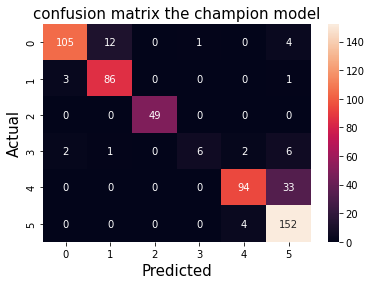

In [208]:
Cf = ConfusionMatrix(y_test, PredCopy[5])
PLOT_ConfusionMatrix(Cf,f'confusion matrix the champion model')